# AIML Capstone Project Computer Vision - Car Detection

<div style="text-align: right"><b>Authors:</b>
<div style="text-align: right">Ankit Garg  <a href="ankitcse07@gmail.com">(ankitcse07@gmail.com)</a></div>
<div style="text-align: right">Sandip Maity  <a href="sandipmaity2006@gmail.com">(sandipmaity2006@gmail.com)</a></div>
<div style="text-align: right">R. Sreelatha  <a href="radha_sreelatha@yahoo.com">(radha_sreelatha@yahoo.com)</a></div>
<div style="text-align: right">Prateek Gupta  <a href="prateek.jaypee@gmail.com">(prateek.jaypee@gmail.com)</a></div>
<div style="text-align: right">N. Sugathri  <a href="nsugathri@yahoo.com">(nsugathri@yahoo.com)</a></div>

Domain: Automotive Surveillance

Problem Statement: Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.

Objective: The object of this project is to design a deep learning based model for car detection.

Approach
- Step 1: Import the data
- Step 2: Map training and testing images to its classes.
- Step 3: Map training and testing images to its annotations. 
- Step 4: Perform Exploratory Data analysis
- Step 4: Load images and preprocess  
- Step 5: Design, train and test CNN models to classify the car and find the bounding boxes. This will also involve creating a pipeline involving data augmentation (like flip, rotate etc),  normalizing the image.  This would all be done online as dataset is large and will not fit in the memory. 
- Step 6: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest
- Step 7: Pickle the best model and use it for further prediction
- Step 8: Design a clickable UI that can automate the tasks of importing the data, mapping the train/test images to its clases, train and build a modell and use the pickled model to predict based on an image input by the user


Data Description:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. Tesla Model S 2012 or BMW M3 coupe 2012.
Data description:
‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.

Evaluation:For evaluating the performance of the models, one or more measures as relevant will be captured.
For classification:
- Categorical Accuracy: Since the class labels will be one-hot encoded, Categorical accuracy will be calculated to measure how often predictions matches one-hot labels.

For the predictions involving bounding boxes:
- Intersection over union (IoU)- a measure of overlap between the ground truth and predicted bounding boxes. A threshold value of IOU above 0.5 would be set. If the IOU is above the threshold the prediction is considered good.

- Precision and recall- While precision indicates what percentage of positive predictions are correct , Recall would indicate what percentage of ground truth objects were found.  True positives are calculated based on  Number_of_detection with IoU > threshold. False positives are number of detections with IoU<=threshold or detected more than once. Fasle Negative = number of objects that not detected or detected with IoU<=threshold.
Precision = True positive / (True positive + False positive); Recall = True positive / (True positive + False negative)

- Average Precision: AP will be computed only for an object class on all images as AVG(Precision for each of 11 Recalls {precision = 0, 0.1, ..., 1}) 

- Mean average precision (mAP): Mean of the average Precision computed for all the classess on all the images. 


# Basic Configuration Information

Conventions followed:
    -project_path : identifies the path to the main project folder 
    -data_path: Path where data stored with subfolders as defined below
    -train_path: path where train data stored
    -test_path: path where test data stored

# The  project folder structure

Under the project path save the data files as per the project structure


Main Project folder (identified by project_path)

project_path
    │
    ├──data
    │  │     anno_train.csv
    │  │     anno_test.csv
    │  │     names.csv
    │  │
       └── car_data
           └── car_data
                └── train (with subfolders for the classes and corresponding images)
                └── test   (with subfolders for the classes and corresponding images)


# Import Basic Libraries
Import the libraries and update the requirements.txt

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Import random and initialize the seed for deterministic results
import random
random.seed(42)

## Import visualizations package
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


import seaborn as sns

from zipfile import ZipFile
import cv2
import os, sys

import pickle

## DL specific packages
import tensorflow
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

## Deep Learning Networks
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet121

## Import Different Layers
from tensorflow.keras.layers import  Flatten, Reshape, Dropout, UpSampling2D, Concatenate, Conv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D


## Install the albumentations package 
## Colab  users  install and restart run time to load  albumentations
#pip install --user albumentations
import albumentations as A


In [2]:
## Applicable if using googlecolab
#Mount google Drive 
#setting default value as False change it to True if using google colab
use_googl_colab = False

if(use_googl_colab):
    from google.colab import drive
    drive.mount('/content/drive')
    #specify the project path
    project_path = "/content/drive/My Drive/Colab Notebooks/AIML Capstone/"

    # change to the project folder
    os.chdir(project_path)

    # Add the path to the sys.path for the session
    sys.path.append(project_path)

#### ATTENTION- Desktop users- check this section and update the main project path 

In [4]:
## Applicable Only  to Desktop users
# set the project folder directory
project_path="../"

In [5]:
## Extract all files, just for the time being
#with ZipFile('../archive.zip', 'r') as z:
#    z.extractall()

#### Common directory structure 

In [7]:
#Setting Path to Data
#the following folderndata_path contains anno_train.csv, anno_test.csv and names.csv files
data_path= project_path
# train_path contains the class specific images from the training data set
train_path=data_path+"/car_data/car_data/train/"
#test path contains the class specific images from the test data set
test_path=data_path+"/car_data/car_data/test"

## Input to the requirements.txt file  <to be updated if any new requirements identified>
    
###### Basic packages- identify the versions and add
* python=3.*
* numpy=1.19
* sklearn=0.24
* streamlit=0.77
* pandas==1.2.1
* tensorflow=2.4
* albumentations=0.5.2

# Load the train and test data and map the data to its classes

* Step 1: Import the data from anno_train.csv, anno_test.csv files
* Step 2: Map training and testing images to its classes. 
* Step 3: Map training and testing images to its annotations. 
* Step 4: Display images with bounding box.
* Step 5: Import the data from names.csv file
* Step 6: Perform exploratory Data analysis

In steps 2/3, we will also perform sanitization checks on the data like bounding boxes are smaller than the image size, folder names are same as that provided in the annotation file, also labels provided are matching as that of folder name. 

Since the train and test annovation .csv files does not have the headers,  while loading the data specifying the headings as identified in the stanford car data set. The fields are respectively
ImageFileName: Name of the file containing the image of the car
x1: Min x-value of the bounding box, in pixels
x2: Max x-value of the bounding box, in pixels
y1: Min y-value of the bounding box, in pixels
y2: Max y-value of the bounding box, in pixels
label_index: Value of the class label

**Bounding boxes given in the dataset are of pascal format, we will convert to coco format**. 

Since the names.csv file contains only the class name and does not have a header, header labels to be specified while loading the data and a label indexing matching with the class to be included.


In [8]:
### Let's declare all globals
global annot_train_df
global annot_test_df
global label_df
global metadata_train
global metadata_test

In [9]:
## This is only required to run on GPUs. GPUs can give lot of acceleration. In case GPU device is available, you will 
## find the gpu name here 
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [10]:
## This function would be implemented when integrating with GUI
def updateProgressBar(value):
    """Keeping the place holder for updating the 
    Need to write custom code wrt api exposed
    by a particular gui platform."""

In [11]:
## Let's write some helper function to load the annotation files
def loadAnnotDataFrame(filename):
    annot_df = pd.read_csv(filename, header=None)
    annot_df.columns = ['ImageFileName', 'x1', 'y1', 'x2', 'y2', 'label_index']
    annot_df.set_index('ImageFileName', inplace=True)
    
    updateProgressBar(2) ## Let's assign this as 2 cost
    return annot_df

In [12]:
##Load the respective frames for the bounding boxes, although we 
## can generate all information based on folder names, only thing that
## is missing is the bounding box information which is present in the csv provided
## with the data-set

def loadTrainTestAnnotFrames():
    global annot_train_df
    global annot_test_df
    global label_df
    annot_train_df = loadAnnotDataFrame(data_path + 'anno_train.csv')
    annot_test_df = loadAnnotDataFrame(data_path + 'anno_test.csv')
    
    label_df = pd.read_csv(data_path + 'names.csv', names=['carname'])
    #Since the index in csv file starts from 1 change the index in names file accordingly 
    label_df.index += 1
    #Changing the index name to label_index similar to the train and test data labels
    label_df.index.names = ['label_index']

In [13]:
## TODO:  This function would be invoked from the event of the button written in GUI
## for the time being I am invoking this explicitly for the EDA part
loadTrainTestAnnotFrames()

# Exploratory Data Analysis¶

As part of exploratory analysis will do :
-a sanity check and ensure all the data has been imported correctly and the columns labelled appropriately
-identify null values and duplicate values if any
-identify the data types and if any further conversion is required
-Identify the distribution of classes, whether any of the classes are over represented/under represented indicating imbalance in the class distribution that would affect the performance. 
- Identify if data split equally among the train and test sets
EDA can provide useful insights of the data and identify what further processing is required that can help build a robust model.

In [14]:
#Sanity check on the records, columns and the min/max labels, null values, data types in train data
print ("------Summary of  train data set--------")
print("Image  annotations in the data set :", len(annot_train_df))
print("No of Columns in the data set :", len(annot_train_df.columns))
print("Total Number of labels= ", annot_train_df.label_index.nunique())
print("Min Label Number = ", annot_train_df.label_index.min())
print("Max Label Number = ", annot_train_df.label_index.max())
print(annot_train_df.info())

------Summary of  train data set--------
Image  annotations in the data set : 8144
No of Columns in the data set : 5
Total Number of labels=  196
Min Label Number =  1
Max Label Number =  196
<class 'pandas.core.frame.DataFrame'>
Index: 8144 entries, 00001.jpg to 08144.jpg
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   x1           8144 non-null   int64
 1   y1           8144 non-null   int64
 2   x2           8144 non-null   int64
 3   y2           8144 non-null   int64
 4   label_index  8144 non-null   int64
dtypes: int64(5)
memory usage: 381.8+ KB
None


As observed there are 8144 images in the train data set with 6 columns identifying the file name corresponding to each image, the bounding box co-ordinages and the class label. The total number of unique classes are 196 with 1 being the minium and 196 maximum. No null values observed in any of the columns.

In [15]:
#Sanity check on the records, columns and the min/max labels, null values, data types in test data
print ("-------Summary of test data set--------")      
print("Image annotations :", len(annot_test_df))
print ("No of columns :", len(annot_test_df.columns))
## To check total labels,  min/max label number
print("Total Number of Unique labels= ", annot_test_df.label_index.nunique())
print("Minimum Label Number = ", annot_test_df.label_index.min())
print("Maximum  Label Number = ", annot_test_df.label_index.max())
print(annot_test_df.info())

-------Summary of test data set--------
Image annotations : 8041
No of columns : 5
Total Number of Unique labels=  196
Minimum Label Number =  1
Maximum  Label Number =  196
<class 'pandas.core.frame.DataFrame'>
Index: 8041 entries, 00001.jpg to 08041.jpg
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   x1           8041 non-null   int64
 1   y1           8041 non-null   int64
 2   x2           8041 non-null   int64
 3   y2           8041 non-null   int64
 4   label_index  8041 non-null   int64
dtypes: int64(5)
memory usage: 376.9+ KB
None


As observed there are 8041 images in the test data set with 6 columns identifying the file name corresponding to each image, the bounding box co-ordinages and the class label. The total number of unique classes are 196 with 1 being the minimum and 196 maximum. No null values observed in any of the columns.All the classes present in train data set are present in test as well

In [16]:
#checking for duplicate images in train and test
duplicates_in_train=annot_train_df.index.duplicated()
print("Count of Duplicate rows in train data:",sum(duplicates_in_train))

Count of Duplicate rows in train data: 0


In [17]:
duplicates_in_test=annot_test_df.index.duplicated()
print ("Count of Duplicate rows in test data ",sum(duplicates_in_test))

Count of Duplicate rows in test data  0


In [18]:
#Sanity check on the records, columns and the min/max labels, null values, data types in Names data
print ("-------Summary of Car Labels data set--------")      
print("Car labels available           :", len(label_df))
print ("No of columns                 :", len(label_df.columns))
## To check total labels,  min/max label number
print("Total Number of unique labels  : ", label_df.index.nunique())
print("Min Label Number               : ", label_df.index.min())
print("Max Label Number               : ", label_df.index.max())
print(label_df.info())
## Total number of duplicates in label names and total number of labels
print("Total duplicate Labels         : ", label_df['carname'].duplicated().sum())
print("Total Number of labels         : ", label_df['carname'].nunique())

-------Summary of Car Labels data set--------
Car labels available           : 196
No of columns                 : 1
Total Number of unique labels  :  196
Min Label Number               :  1
Max Label Number               :  196
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 1 to 196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carname  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Total duplicate Labels         :  0
Total Number of labels         :  196


Total number of unique labels is **196**, this is matching that in train/test dataframe. This makes it clear, that dataset is clean without any errors

In [19]:
## Let's find distribution of label in train/test dataset
label_train_dist = annot_train_df.label_index.value_counts().sort_values(ascending=False)

max_count_index = label_train_dist.index[0]
print("Train => Label = {} has a maximum count of = {} ".format(max_count_index, label_train_dist[max_count_index]))
min_count_index = label_train_dist.index[-1]
print("Train => Label = {} has a minimum count of = {} ".format(min_count_index, label_train_dist[min_count_index]))

Train => Label = 119 has a maximum count of = 68 
Train => Label = 136 has a minimum count of = 24 


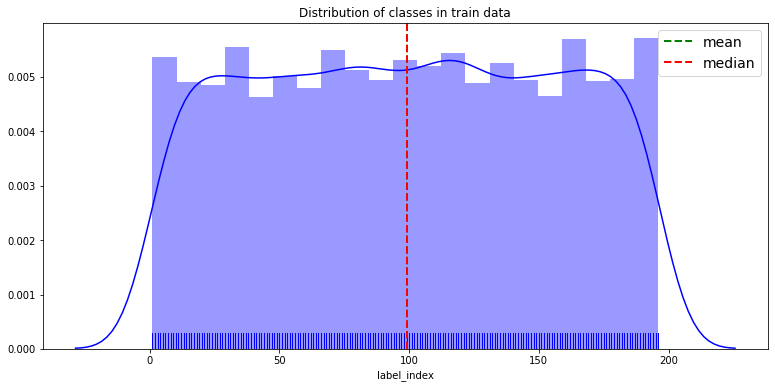

In [20]:
plt.figure(figsize=(13,6))
sns.distplot(annot_train_df["label_index"],color="b",rug=True)
plt.axvline(annot_train_df["label_index"].mean(),
            linestyle="dashed",color="g",
            label='mean',linewidth=2)
plt.axvline(annot_train_df["label_index"].median(),
            linestyle="dashed",color="r",
            label='median',linewidth=2)
Q1=annot_train_df.label_index.quantile(0.25)
Q2=annot_train_df.label_index.quantile(0.75)

plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of classes in train data")
plt.show();

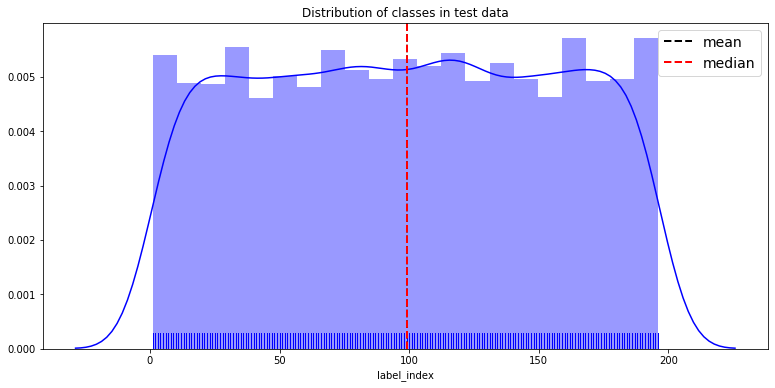

In [21]:
plt.figure(figsize=(13,6))
sns.distplot(annot_test_df["label_index"],color="b",rug=True)
plt.axvline(annot_test_df["label_index"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.axvline(annot_test_df["label_index"].median(),
            linestyle="dashed",color="r",
            label='median',linewidth=2)

Q1=annot_test_df.label_index.quantile(0.25)
Q2=annot_test_df.label_index.quantile(0.75)

plt.legend(loc="best",prop={"size":14})
plt.title("Distribution of classes in test data")
plt.show();

#### Distributions plotted in different ways

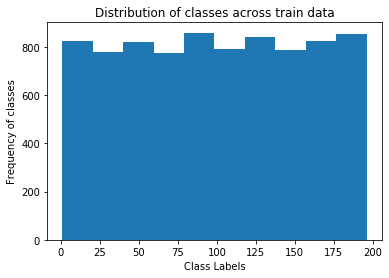

In [22]:
#Plot a histogram of the class_id column to check the distribution
annot_train_df.label_index.plot.hist()
plt.title("Distribution of classes across train data")
plt.xlabel('Class Labels')
plt.ylabel('Frequency of classes');

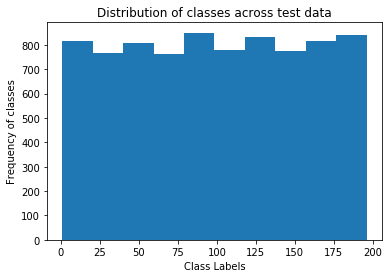

In [23]:
#Plot a histogram of the class_id column to check the distribution across classes in test data
annot_test_df.label_index.plot.hist()
plt.title("Distribution of classes across test data")
plt.xlabel('Class Labels')
plt.ylabel('Frequency of classes');

C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


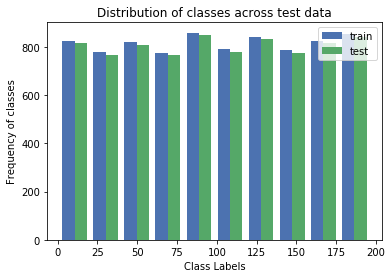

In [24]:
#plot combining the train/test data 
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

plt.hist([annot_train_df.label_index, annot_test_df.label_index],label=['train', 'test'])
plt.legend(loc='upper right')
plt.title("Distribution of classes across test data")
plt.xlabel('Class Labels')
plt.ylabel('Frequency of classes')
plt.show();

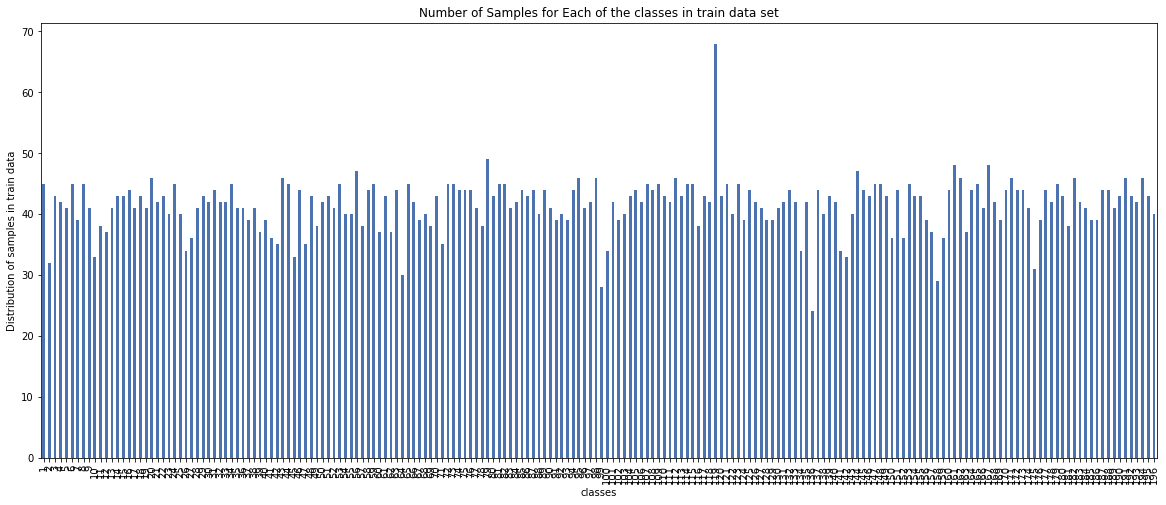

In [25]:
train_class=pd.DataFrame()
train_class['label_index']=annot_train_df['label_index']
train_class.groupby(['label_index']).size().plot.bar(figsize=(20,8),title="Number of Samples for Each of the classes in train data set")
plt.xlabel("classes")
plt.ylabel("Distribution of samples in train data");

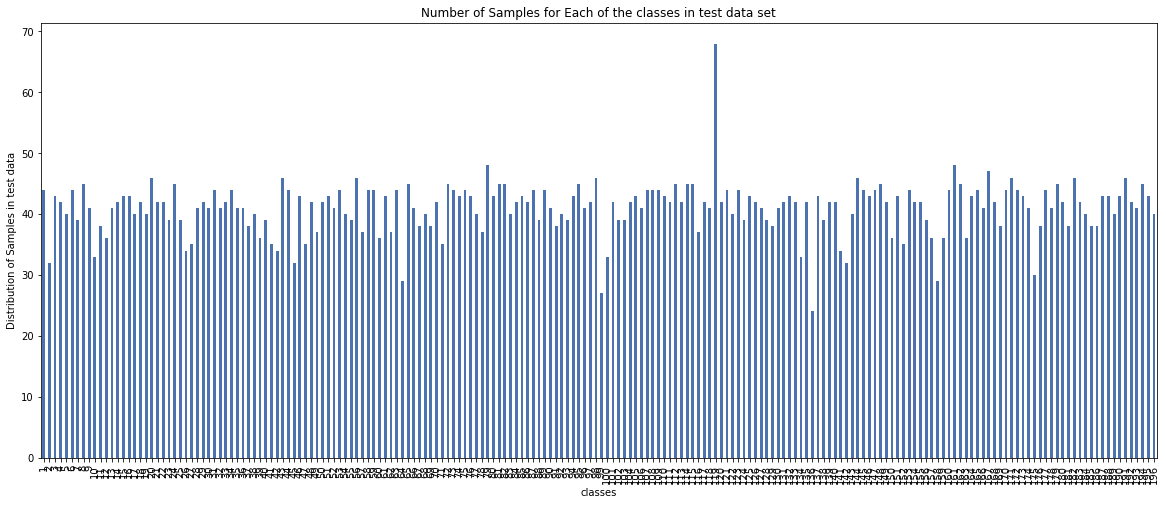

In [26]:
test_class=pd.DataFrame()
test_class['label_index']=annot_test_df['label_index']
test_class.groupby(['label_index']).size().plot.bar(figsize=(20,8),title="Number of Samples for Each of the classes in test data set")
plt.xlabel("classes")
plt.ylabel("Distribution of Samples in test data");

As can be observed from the data , there is a slight imbalance in the distribution of data across the classes with label 119 being most represented with 68 samples in train data while the least represented was 136(24 samples). 
However among the two data sets there seems to be some correspondence between the distribution across the classes indicating that there is almost a 50-50 data split across the train and test data specified.

### Sample images, check dimensions and display images with the bounding boxes¶

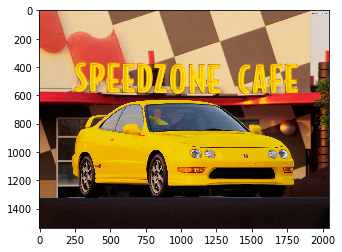

Dimensions of the sample image from train data set
height: 1536 width: 2048 channels: 3


In [27]:
#Plot a sample image from train data set
from PIL import Image
sample_image = Image.open(train_path+'/Acura Integra Type R 2001/03968.jpg')  
imgplot = plt.imshow(sample_image)  
plt.show()  
#convert the image to an np array and check the image dimensions
dims = np.shape(sample_image)
print("Dimensions of the sample image from train data set")
print('height:',dims[0],'width:' ,dims[1],'channels:',dims[2])

In [28]:
# For  image specific classification and transformation,  would need to collapse spatial dimensions so that we have a matrix of pixels by color channels.
#checking the matrix dimensions
pixel_matrix = np.reshape(sample_image, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(3145728, 3)


In [29]:
#convert the image to an array and check the image dimensions
sample_train2 = plt.imread(train_path+'/Chevrolet Traverse SUV 2012/00998.jpg')
dims = np.shape(sample_train2)
print("Sample train image size:", dims)
pixel_matrix = np.reshape(sample_train2, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

Sample train image size: (480, 640, 3)
(307200, 3)


In [30]:
#check for image dimensions in test images
sample_test1 = plt.imread(test_path+'/Acura TSX Sedan 2012/03090.jpg')
dims = np.shape(sample_test1)
print("Sample test image size:", dims)
pixel_matrix = np.reshape(sample_test1, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

Sample test image size: (292, 467, 3)
(136364, 3)


As observed there is difference in dimensions across the images and hence they need to be resized to a common scale for further processing as required if pre-trained convolutional models are used initially for feature extraction

Checking the samples of cars from similar make ,model and year

In [31]:
#custom function to plot some samples of a particular make of car
import matplotlib.pyplot as plt
import os

def plot_images(path):
    #plot atleast few samples of a particular car class and check
  
    f, axarr = plt.subplots(5,4, figsize=(10,10))
    images_list = []
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        img = cv2.imread(image_path)
        images_list.append(img)
    for i in range(5):
        for j in range(4):
            axarr[i,j].imshow(images_list.pop())

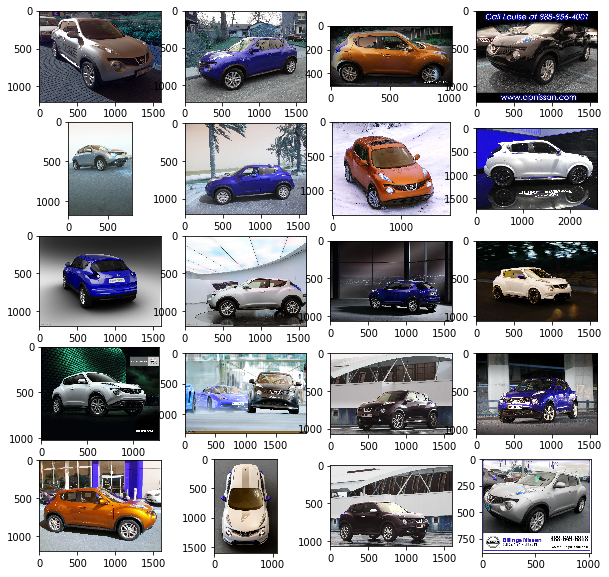

In [32]:
#Let us check the images of cars in the train data set that have the similar make, model and year (ie same class label )
#Since there are atleast 24 cars in each class , let us take the quick look at atleast 20 .
plot_images(train_path+'/Nissan Juke Hatchback 2012/')



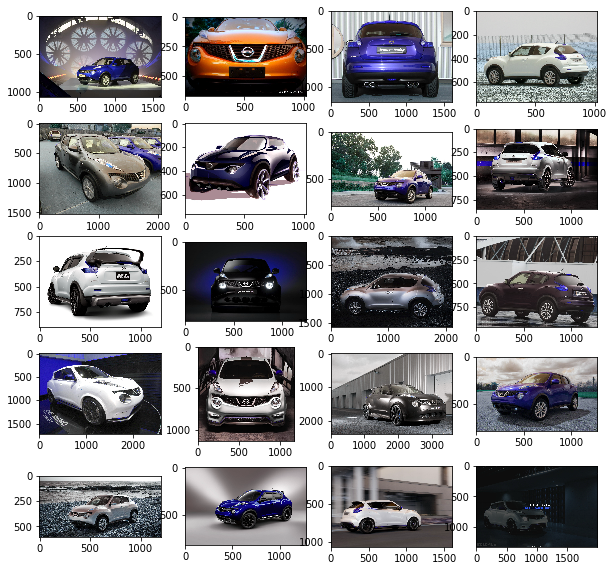

In [33]:
#Let us check the images of a particular make model year of car in test data set
plot_images(test_path+'/Nissan Juke Hatchback 2012/')



Images of the cars in both data sets are in different alignments,  views and  illumination levels. The color of the images and the back ground colors are also varying.

Display the images and the corresponding bounding boxes¶

In [34]:
annot_train_df.reset_index(inplace=True)
train_df = pd.merge(annot_train_df, label_df, on="label_index", how="left") 
print(train_df.head())

  ImageFileName   x1   y1    x2    y2  label_index  \
0     00001.jpg   39  116   569   375           14   
1     00002.jpg   36  116   868   587            3   
2     00003.jpg   85  109   601   381           91   
3     00004.jpg  621  393  1484  1096          134   
4     00005.jpg   14   36   133    99          106   

                               carname  
0                  Audi TTS Coupe 2012  
1                  Acura TL Sedan 2012  
2           Dodge Dakota Club Cab 2007  
3     Hyundai Sonata Hybrid Sedan 2012  
4  Ford F-450 Super Duty Crew Cab 2012  


In [35]:
#get the file paths for the classes to that the class name and file anme is included
def get_file_path(dir, carname, image_id):
  car_file_path = os.path.join(dir, carname, image_id)
  return car_file_path
#appending the path of the image file to the train dataframe created and check the label and folder in which images appear
train_df['file_path'] = train_df.apply(lambda row: get_file_path(train_path, row.carname, row.ImageFileName), axis=1)
#print(train_df)

In [36]:
import matplotlib.patches as patches
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import cv2
#Define a custom function to plot the images with bounding boxes

def display_image_with_boundingbox(image):
  fig,ax = plt.subplots(1)

  x1 = image.x1
  y1 = image.y1
  x2 = image.x2
  y2 = image.y2

  unscaled = cv2.imread(image.file_path) # Original image for display
  unsclaed = ax.imshow(unscaled[...,::-1])

  # Create a Rectangle patch
  rect = patches.Rectangle((x1, y1), (x2 - x1) , (y2 - y1), linewidth=2, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

  plt.show()
  return;

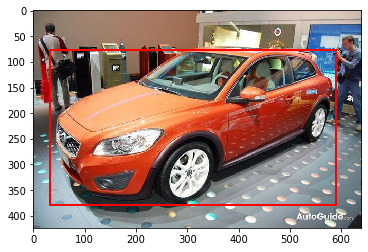

'Volvo C30 Hatchback 2012'

In [37]:
#pick a random image from the train data set and display the image with bounding box and check whether label appropriate
display_image_with_boundingbox(train_df.loc[14])
train_df.loc[14].carname

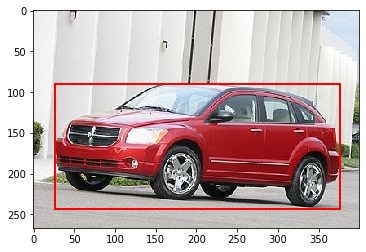

'Dodge Caliber Wagon 2012'

In [38]:
display_image_with_boundingbox(train_df.loc[114])
train_df.loc[114].carname

In [39]:
# plot the image and bounding box and check the label for few samples from test data set
annot_test_df.reset_index(inplace=True)
#print(annot_test_df)
test_df = pd.merge(annot_test_df, label_df, on="label_index", how="left") 
#print(test_df.head())
test_df['file_path'] = test_df.apply(lambda row: get_file_path(test_path, row.carname, row.ImageFileName), axis=1)


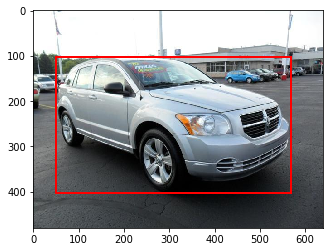

'Dodge Caliber Wagon 2012'

In [40]:
display_image_with_boundingbox(test_df.loc[14])
test_df.loc[14].carname

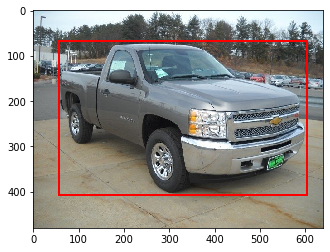

'Chevrolet Silverado 1500 Regular Cab 2012'

In [41]:
display_image_with_boundingbox(test_df.loc[56])
test_df.loc[56].carname

Based on the analysis of the images, it is evident that the images have widely varying dimensions . Also the alignments, brightness levels, contrast with background etc vary.

In [42]:
## Let's use fixed image processed size of 224x224 required to be fed to Deep Networks.  Many pre-trained networks
## use a fixed size image. Let's define 2 variables to control this
IMAGE_SIZE = 300

In [43]:
import PIL
## Some utility function to load images
def load_image(path):
    
    ## There is some problem with cv2, I found that cv2 is giving incorrect orientation
    ## reversing heightxwidth and hence bounding box become invalid, so switch to 
    ## PIL 
    #img = cv2.imread(path, 1)
    
    ## We need to convert to RGB format
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = PIL.Image.open(path).convert('RGB')
    return np.asarray(img)

### Calculate the mean/std of the train dataset
This function is calculating the mean and std of the complete train dataset. As we cannot load the complete dataset in one go so each image is loaded and the sum across each channel is calculated, finally mean is obtained across each channel. Further this mean is used to calculate the std. Call of this function is heavy, so we calculated the mean/std once and resued it further. 

In [44]:
dataset_mean = [0,0,0]
dataset_std = [0,0,0]
total_pixels = 0 
def populateMeanForTheDataset(path):
    global total_pixels
    global dataset_mean
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            img_path = os.path.join(path, i, f)
            img = load_image(img_path)
            dataset_mean[0] = np.sum(img[:,:,0]) + dataset_mean[0]
            dataset_mean[1] = np.sum(img[:,:,1]) + dataset_mean[1]
            dataset_mean[2] = np.sum(img[:,:,2]) + dataset_mean[2]
            total_pixels = img.shape[0]*img.shape[1] + total_pixels
    dataset_mean[0] = (dataset_mean[0]/total_pixels)
    dataset_mean[1] = (dataset_mean[1]/total_pixels) 
    dataset_mean[2] = (dataset_mean[2]/total_pixels)


def populateStdForDataset(path):
    global total_pixels
    global dataset_mean
    global dataset_std
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            img_path = os.path.join(path, i, f)
            img = load_image(img_path)
            
            dataset_std[0] = np.sum((img[:,:,0] - dataset_mean[0])**2) + dataset_std[0]
            dataset_std[1] = np.sum((img[:,:,1] - dataset_mean[1])**2) + dataset_std[1]
            dataset_std[2] = np.sum((img[:,:,2] - dataset_mean[2])**2) + dataset_std[2]

    dataset_std[0] = np.sqrt(dataset_std[0]/total_pixels)
    dataset_std[1] = np.sqrt(dataset_std[1]/total_pixels) 
    dataset_std[2] = np.sqrt(dataset_std[2]/total_pixels)

## Both mean/std needs to be scaled with max value of pixel-> 255.0. This is expected
## by all libraries
dataset_mean[0] = dataset_mean[0]/255.0
dataset_mean[1] = dataset_mean[1]/255.0
dataset_mean[2] = dataset_mean[2]/255.0

dataset_std[0] = dataset_std[0]/255.0
dataset_std[1] = dataset_std[1]/255.0
dataset_std[2] = dataset_std[2]/255.0
    
## Commenting these as this takes some time, also mean should be populated first
## and then std should be calculated
#populateMeanForTheDataset(train_path)
#populateStdForDataset(train_path)


## Above gave the following mean/std for the dataset

dataset_mean = (0.4496688992557394, 0.45574301638171105, 0.46740698326736607)
dataset_std =  (0.30231249701424134, 0.2940775677688968, 0.2954279952860252)

### Data augmentation 
This is a class whose function will be called during the data preparation, so this is part of the pipeline. Class is based on the package albumnetation which is a utility package for doing data-augmentation on the image. This package also take care of the bounding boxes transformation as those will also change after performing transformation on the image. 

In [45]:
class DataAugmentationTechniques():
## This class takes cares of all data-augmentation techniques at one place
## We will use to randomly pick any one or none 

    def __init__(self):
        
        self.data_augment = {}
        
        ## You can add more transformations here 
        self.data_augment[0] = A.Compose([
            A.Resize(IMAGE_SIZE, IMAGE_SIZE),   ## Resize based on the Model Network requirement 
            A.HorizontalFlip(p=0.5),            ## Horizontal flip
            A.Rotate(15),                       ## Random Rotate
            A.Normalize(dataset_mean, dataset_std),  ## Normalize image based on the calculated mean/std before
          ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['label_index']))
        
        self.data_augment[1] = A.Compose([
            A.Resize(IMAGE_SIZE, IMAGE_SIZE),
            A.Rotate(15), 
            A.VerticalFlip(p=0.5),
            A.Normalize(dataset_mean, dataset_mean),
          ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['label_index']))
        
        self.data_augment[2] = A.Compose([
            A.Resize(IMAGE_SIZE, IMAGE_SIZE),
            A.Rotate(limit=40),
            A.RandomBrightness(limit=0.1),
            A.HorizontalFlip(),
            A.Normalize(dataset_mean, dataset_mean),
        ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['label_index']))
        
        ## Index 2 is for Resizing
        self.data_augment[3] = A.Compose([
            A.Resize(IMAGE_SIZE, IMAGE_SIZE),
            A.Normalize(dataset_mean, dataset_std),
        ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['label_index'] ))
        
        
    ## This should be called after doing data-augmentation
    ## This does simple normalization by dividing by 255. Everywhere I found images
    ## those have been data-augmented have been done simple normalization
    def scale_image_and_bbox(self, image, bboxes, label):
        transformed = self.data_augment[3](image=image, bboxes=[bboxes], label_index=[label])
        return transformed['image'], transformed['bboxes'][0], label
    
    ## This will crop the bbox and also take border of around 16-pixels 
    ## so that some context is still present
    def crop_based_on_bbox(self, image, bboxes, labels):
        ## First crop the image with bbox 
        x1 = bboxes[0]
        y1 = bboxes[1]
        x2 = bboxes[2] + x1
        y2 = bboxes[3] + y1
        
        x1 = x1 - 16
        y1 = y1 - 16
        if(x1 < 0 ):  ## 16-pixes context
            x1 = 0 
        if ( y1 < 0 ):
            y1 = 0
                      
        x2 = x2 + 16
        y2 = y2 + 16
        if(x2 > image.shape[1]):
            x2 = image.shape[1] - 1
        if(y2 > image.shape[0]):
            y2 = image.shape[0] - 1
        
        transform = A.Compose([
            A.Crop(x1,y1, x2,y2)],
            bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['label_index']))
        
        transformed = transform(image=image, bboxes=[bboxes], label_index=[labels])

        return transformed['image'], transformed['bboxes'][0]
    
    ## This is the function that will be called during Dataset preparation. This function randomly picks 
    ## any one transformation from the list of data_augment and apply the same to the image as input. 
    ## The transformed image, bounding box and the labels are returned as output. This function would only
    ## be called during training and not during validation or testing
    def transform_image_bbox_label(self, image, bboxes, labels, transform=None):

        if(transform is None):
            randIdx = np.random.randint(0, len(self.data_augment) -1)
            transform = self.data_augment[randIdx]
        transformed = transform(image=image, bboxes=[bboxes], label_index=[labels])
        
        scaled_img, scaled_label, scaled_bbox = transformed['image'], transformed['label_index'][0], transformed['bboxes'][0], 
        if(len(transformed['bboxes']) == 0):
            scaled_img = image
            scaled_label = labels
            scaled_bbox = bboxes

        #scaled_img = tf.cast(scaled_img/255.0, tf.float32)
        scaled_bbox = tf.cast(scaled_bbox, tf.float32)
        return scaled_img, labels, scaled_bbox
    
    
    def perform_simple_normalization(self, input_img, bbox, label):
        scaled_img, scaled_bbox, _ =  self.scale_image_and_bbox(input_img, bbox, label)
        
        scaled_img = preprocess_input(scaled_img)
        scaled_img = tf.cast(scaled_img, tf.float32)
        
        scaled_bbox = tf.cast(scaled_bbox, tf.float32)
        return scaled_img,  label, scaled_bbox
    
    ## This function simply does resize/normalize and no data-augmentation. This function will be called during
    ## testing/validation
    def resize_and_rescale(self, input_img, bbox, label):
        scaled_img, scaled_bbox, _ =  self.scale_image_and_bbox(input_img, bbox, label)
        scaled_img = tf.cast(scaled_img, tf.float32)
        scaled_bbox = tf.cast(scaled_bbox, tf.float32)
        return scaled_img,  label, scaled_bbox
        
data_augment = DataAugmentationTechniques() 

## Loading the images and creating the metadata
Steps:
- Populate the data-structure DatasetMetaData which will have all information contained in place like image-path, label, encoded label, bounding-box. Final output will be array for of such objects for each image. 
- During population it reads the all annotation files and gather information on labels, bounding box etc
- It will also perform the sanization checks on the dataset like size of bounding box should be less the image size, labels provided are matching those of the folder names, folder names are matching those in the annotation files. 
- Bounding box provided are in pascal format, we are converting this in coco format. 
    

In [68]:
class DatasetMetaData():
    def __init__(self, base, name, file, id, label, bbox):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
        self.id = id
        self.label = label
        self.label_encoded = None
        self.bbox = bbox
        
        ## Also prepare the scaled bounding box according to the image size
        self.scaled_bbox = None
    
    def image_name(self):
        return self.name

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    @staticmethod
    ## Utility function which displays the image with the bounding box 
    ## Can take bbox both in coco and pascal format
    def image_with_bbox(img, bbox, is_coco = True, figure = None, ax = None, true_bbox = None, 
                        chosen_model = None,
                        pred_label = None,
                        true_label = None
                       ):
        
        if(figure is None):
            figure, ax = plt.subplots(1, figsize=(7,7))
        
        ax.imshow(img)
        
        if(bbox is not None):
            if(is_coco):
                width = bbox[2]
                height = bbox[3]
            else:
                width = bbox[2] - bbox[0]
                height = bbox[3] - bbox[1]
            patch = patches.Rectangle((bbox[0], bbox[1]), 
                                      width, 
                                      height, linewidth=2, color='r', fill=False, label="Predicted Bounding Box")
        
            ax.add_patch(patch)
        
        if(pred_label is not None):
            ax.set_xlabel("Predicted = {}".format(pred_label))
            ax.set_xticklabels([])
            
        

        
        if(true_bbox is not None):
            
            if(is_coco):
                width = true_bbox[2]
                height = true_bbox[3]
            else:
                width = true_bbox[2] - true_bbox[0]
                height = true_bbox[3] - true_bbox[1]
            patch = patches.Rectangle((true_bbox[0], true_bbox[1]), 
                                      width, 
                                      height, linewidth=2, color='b', fill=False, label = "True Bounding Box")
            ax.add_patch(patch)
            plt.legend()
                        
            ax.set_ylabel("Actual = {}".format(true_label))
            ax.set_yticklabels([])


        
        if(chosen_model is not None):
            ax.set_title(f"Prediction for Model = {chosen_model}")
                            
    @staticmethod
    ## This is the main function which iterates over the dataset and populate the DatasetMetaData 
    def load_metadata(path, df, is_train=True):
        metadata = []
        global totalImagesDone
        anyMismatchInDirectoryName = False
        anyBadLabel = False
        directoryNameMatched= []
        directoryNameMismatched = []
        boundingBoxBigger = False
        for i in os.listdir(path):
            label_from_directory = -1
            if(i not in label_df['carname'].values):
                print("Label = {} not found in annotation file".format(i))
                directoryNameMismatched.append(i)
                anyMismatchInDirectoryName = True
                label_from_directory = label_df[label_df['carname'] =="Ram C/V Cargo Van Minivan 2012"].index[0]
            else:
                directoryNameMatched.append(i)
                label_from_directory = label_df[label_df['carname'] == i].index[0]
            
            for f in os.listdir(os.path.join(path, i)): 
                id = f 
                ## Read the data from data frames and populate in the object
                label = df.loc[id]['label_index']
                
                if((label != label_from_directory)):
                    print("Label mismatch for image = {} {} {}".format(f, label_from_directory, label))
                    anyBadLabel = True
                    
                ## Also this is a pascal format, let's convert this to coco-format 
                ## as this what expected by all Deep networks 
                bbox = (df.loc[id]['x1'], df.loc[id]['y1'], 
                        (df.loc[id]['x2'] - df.loc[id]['x1']) , (df.loc[id]['y2'] - df.loc[id]['y1']))
            
                totalImagesDone = totalImagesDone + 1
            
                if(totalImagesDone == 72):
                    updateProgressBar(1)
                    totalImagesDone = 0
                    
                metaObj = DatasetMetaData(path, i, f, id, label, bbox)
                
                img = PIL.Image.open(metaObj.image_path())
                #img = load_image(metaObj.image_path())
                #img_height = img.shape[0]
                #img_width = img.shape[1]
                img_height = img.size[1]
                img_width = img.size[0]
                
                ## Bounding box sanitization check 
                if(bbox[3] > img_height or bbox[2] > img_width): 
                    print("Bounding box {} larger than image size{} for image {}".format(bbox, img.size, metaObj.image_path()))
                    boundingBoxBigger = True
            
                    
                metadata.append(metaObj)
         
        ## label mismatch check      
        label_mismatch = [label  for label in label_df['carname'].values if label not in directoryNameMatched ]

        if(not anyMismatchInDirectoryName):
            print("All Directory name matched the annotation names, sanitization check successful!")
        else:
            print("Mismatch directory names in annotation file ->", label_mismatch) 
            
        if(boundingBoxBigger):
            print("Some bounding box found to be bigger than image size")
        else:
            print("Success: All bounding box for the dataset found to be smaller than image size !")

        if(anyBadLabel):
            print("Mismatch in labels in dataset")
        else:
            print("Success: All labels for each image matched as that obtained from directory name!")
        return np.array(metadata)

In [47]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

## Top function which populates the global list metadata_train/metadata_test which will be a list of DatsetMetaData
## objects
def loadMetaDataAndLinkDataFrames():
    global metadata_train
    global metadata_test
    
    ## Load the training metadata
    
    print(f"\n Loading Training Data ....\n")

    metadata_train = DatasetMetaData.load_metadata(train_path, annot_train_df)
    
    
    metadata_train_label_encoded = labelEncode.fit_transform([m.label for m in metadata_train])
    metadata_train_label_encoded = to_categorical(metadata_train_label_encoded, dtype='int32')

    updateProgressBar(5)

    for idx, m in enumerate(metadata_train):
        m.label_encoded = metadata_train_label_encoded[idx]
    
    print(f"\n Loading Testing Data ....\n")

    updateProgressBar(5)

    metadata_test = DatasetMetaData.load_metadata(test_path, annot_test_df, False)

    metadata_test_label_encoded = labelEncode.transform([m.label for m in metadata_test])
    metadata_test_label_encoded = to_categorical(metadata_test_label_encoded, dtype='int32')

    updateProgressBar(5)


    for idx, m in enumerate(metadata_test):
        m.label_encoded = metadata_test_label_encoded[idx]
        
    updateProgressBar(5)

In [48]:
## This is the final function which does all pre-processing steps. This function should be called
## from the GUI event of button click as a first milestone step in the capstone project. 
def performTasksMileStone1():
    global totalImagesDone
    global progressBarValue
    totalImagesDone = 0
    progressBarValue = 0
    updateProgressBar(0)

    loadTrainTestAnnotFrames()
    loadMetaDataAndLinkDataFrames()
    print(f"\n All Tasks for Milestone 1 Done.\n")

In [49]:
## TODO: Invoking the task for first milestone, this needs to be done with gui app
performTasksMileStone1()


 Loading Training Data ....

Label = Ram C-V Cargo Van Minivan 2012 not found in annotation file
Mismatch directory names in annotation file -> ['Ram C/V Cargo Van Minivan 2012']
Success: All bounding box for the dataset found to be smaller than image size !
Success: All labels for each image matched as that obtained from directory name!

 Loading Testing Data ....

Label = Ram C-V Cargo Van Minivan 2012 not found in annotation file
Mismatch directory names in annotation file -> ['Ram C/V Cargo Van Minivan 2012']
Success: All bounding box for the dataset found to be smaller than image size !
Success: All labels for each image matched as that obtained from directory name!

 All Tasks for Milestone 1 Done.



As we see from above there is a slight mistake in the directory name in the dataset vs file present in the annotation name. Although we have label indexes associated to each image name so this will not going to make as such any difference. Dataset seems to be clean and passing all sanity checks  

#### Display images picking some random object from metadata_train/metatdata/test lists

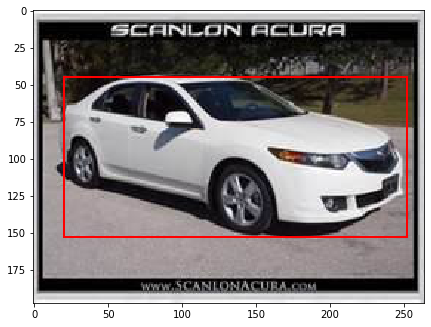

In [69]:
## This is the original image with the bounding box. 
DatasetMetaData.image_with_bbox(load_image(metadata_train[200].image_path()), metadata_train[200].bbox)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


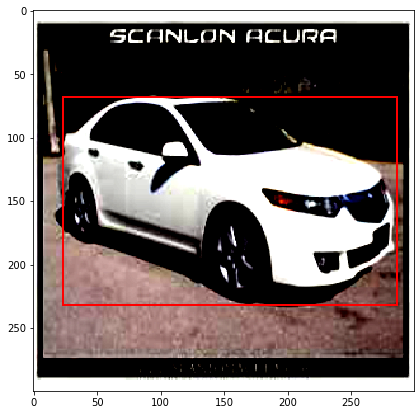

In [70]:
## Perform image transformation. This will pick any random transformation and apply on the image
img = load_image(metadata_train[200].image_path())
img_transformed, label, bbox = data_augment.transform_image_bbox_label(img, metadata_train[200].bbox, metadata_train[200].label_encoded)
DatasetMetaData.image_with_bbox(img_transformed, bbox)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


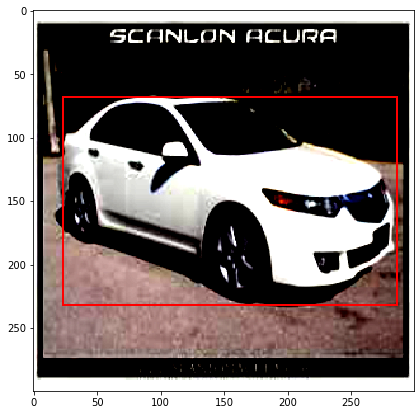

In [71]:
## Does simple re-sizing/normalize of the image. Will be called only during test/validation
image_arr, label, scaled_bbox = data_augment.resize_and_rescale(load_image(metadata_train[200].image_path()), 
                                                                  metadata_train[200].bbox, metadata_train[200].label)
DatasetMetaData.image_with_bbox(image_arr,  scaled_bbox, True)

### CNN Modeling
Onwards will now design different CNN models and display results. We have applied multiple approaches.

In [96]:
## This function will predict the results on batch bases and not load the complete data
## This will help contain the memory so that we are not required to load the complete test
## data in-memory
from tqdm import tqdm
import sys

def batchWisePrediction(model, metadata, batch_size, label_encoder):
    totalBatches = int(len(metadata) / batch_size)
    lenDataset = len(metadata)
    
    Y_pred_bbox = np.zeros((0, 4))
    Y_pred_label = np.array([])
    Y_true_label = np.array([m.label for m in metadata])
    Y_true_bbox = np.zeros((0,4))

    for i in tqdm(range(totalBatches)):
        if(((i+1)*batch_size + batch_size ) < lenDataset):
            metadata_batch = metadata[i*batch_size:(i*batch_size + batch_size)]
        else:
            metadata_batch = metadata[i*batch_size:lenDataset]

        X_batch = np.zeros((len(metadata_batch), IMAGE_SIZE, IMAGE_SIZE, 3))
    
        for idx, m in enumerate(metadata_batch):
            scaled_img, _, scaled_bbox = data_augment.resize_and_rescale(load_image(m.image_path()), m.bbox, m.label_encoded)
            X_batch[idx] = scaled_img
            Y_true_bbox = np.append(Y_true_bbox, scaled_bbox.numpy().reshape(1,-1), axis=0)
    
        Y_pred_label_batch, Y_pred_bbox_batch = model.predict(X_batch)
        #Y_pred_label_batch= model.predict(X_batch)
        Y_pred_bbox = np.append(Y_pred_bbox, Y_pred_bbox_batch, axis=0)
        Y_pred_label = np.append(Y_pred_label, np.argmax(Y_pred_label_batch, axis=1))
    
    Y_pred_label = Y_pred_label.astype(np.int32)
    Y_pred_label = label_encoder.inverse_transform(Y_pred_label)
    return Y_true_label , Y_pred_label, Y_true_bbox, Y_pred_bbox

In [58]:
## Define the Intersection over union , this will used as metric during bounding box evaluation. 
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

def IOU_tensorflow_version(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

In [52]:
## These are set of functions called during pipelining for dataset preparation. These functions will then called funcions
## in DataAugmentation class. 

from functools import partial
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Functions to help prepare the data-pipeline.
def set_shapes(img, concat_result):
    img.set_shape((IMAGE_SIZE, IMAGE_SIZE, 3))
    return img, concat_result

def aug_fn(image, label, bbox):
    image_string = tf.io.read_file(image)
    image = tf.image.decode_jpeg(image_string, channels=3)
    
    aug_img, aug_label, aug_bbox = data_augment.transform_image_bbox_label(image.numpy(), bbox, label)
    
    # You can also choose simple normalization too
    #aug_img,  aug_label, aug_bbox,  = data_augment.perform_simple_normalization(image.numpy(), bbox, label)

    ## no transformation on labels
    return aug_img, aug_bbox

def valtest_fn(image, label, bbox):
    image_string = tf.io.read_file(image)
    image = tf.image.decode_jpeg(image_string, channels=3)
    
    ## This will only resize/rescaling and no data-augmentation, which is valid only for test/val time
    aug_img, aug_label, aug_bbox = data_augment.resize_and_rescale(image.numpy(), bbox, label)
    
    ## no transformation on labels
    return aug_img, aug_bbox


def process_data(image, dict_out, is_test_or_val = False):
    label = dict_out['class_label']
    bbox = dict_out['bounding_box']
    
    if(is_test_or_val):
        aut_img, aug_bbox = tf.numpy_function(func=valtest_fn, inp=[image, label, bbox], Tout=[tf.float32, tf.float32])
    else:
        aut_img, aug_bbox = tf.numpy_function(func=aug_fn, inp=[image, label, bbox], Tout=[tf.float32, tf.float32])
    
    ## This return the dict-based output, these names should match that used in layers
    
    ## In  case you only want to do classification just un-comment this
    #return aut_img, ({'class_label': label})
    
    ## For both bbox and classification this is needed
    return aut_img, ({'class_label' : label, 'bounding_box':aug_bbox})

## Helper function to see the batch of images
def view_image(ds):
    image, dict1 = next(iter(ds)) # extract 1 batch from the dataset
    image = image.numpy()
    label = dict1['class_label']
    bbox = dict1['bounding_box']
    print("Shape = ", image.shape)
    print("Shape = ", label.shape)
    print("Shape = ", bbox.shape)
    fig = plt.figure(figsize=(22, 22))
    for i in range(20):
        ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
        ax.imshow(image[i])
        ax.set_title(f"Label: {label[i]}")

In [53]:
## These are required to be created to feed to dataset generation, using these list
## batch of data 

## Let's split the training data into 80-20 using K-Fold 

from sklearn.model_selection import train_test_split
X = [m for m in metadata_train]
Y = [m.label for m in metadata_train]

#X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y)
X_train = X

train_filelist = [m.image_path() for m in X_train]
train_label = [m.label_encoded for m in X_train]
train_bbox = [m.bbox for m in X_train]

X_val = [m for m in metadata_test]
validation_meta = X_val 
val_filelist = [m.image_path() for m in validation_meta]
val_label = [m.label_encoded for m in validation_meta]
val_bbox = [m.bbox for m in validation_meta]


## This is creating the data in batches, data creation pipe-line. This calls the data-augmentation functions provided
## as callback. 
def createDataSetForBatch(batch_size):
    # create train dataset using the slice list
    dataset_train = tf.data.Dataset.from_tensor_slices((train_filelist, {'class_label': train_label, 'bounding_box' : train_bbox}))
    dataset_train = dataset_train.shuffle(len(train_filelist))
    dataset_train = dataset_train.map(process_data,  num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
    dataset_train = dataset_train.map(set_shapes, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)
    
    ## Create the validation dataset, this will not invoke data-augmentation pipeline, simply resize and rescale
    dataset_val = tf.data.Dataset.from_tensor_slices((val_filelist, {'class_label': val_label, 'bounding_box' : val_bbox}))
    #dataset_val = dataset_val.shuffle(len(val_filelist))
    dataset_val = dataset_val.map(partial(process_data,  is_test_or_val=True ),  num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
    dataset_val = dataset_val.map(set_shapes, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)
    return dataset_train, dataset_val


# MobileNet V2 Based Model for Classification 

In [ ]:
# definining custom function to plot loss and accuracy
def plot_graphs(history, string):
  plt.plot(history.history[string],'r')
  plt.plot(history.history['val_'+string],'g')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
from keras import regularizers
def GetMobileNetV2ClassificationModel():
    """base_model= tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', 
                            include_top=False) """

    base_model= tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet',include_top=False,alpha=1.4)
    x= base_model.output
    x= tf.keras.layers.GlobalAveragePooling2D()(x)
    x=tf.keras.layers.Dense(1024,activation="relu")(x)
    x = Dropout(.6)(x)
    
    
    softmaxHead = Dense(196, activation="softmax", name="class_label")(x)
    #one classification output here
    classification_model=Model(inputs=base_model.input,outputs=[softmaxHead])

    base_model.trainable = True
    for i, layer in enumerate(base_model.layers):
        layer.trainable = True

        
    return classification_model

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler,ReduceLROnPlateau

def TrainMobileNetV2ClassificationModel():
    
  
    batch_size=64
    dataset_train, dataset_val = createDataSetForBatch(batch_size, True)

    opt=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

    model_checkpoint = ModelCheckpoint("mobilenet_sgd3_-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
    stop = EarlyStopping(monitor="val_loss", patience=10, mode = 'min')
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-5, verbose=1, mode = 'min')
    callbacks = [model_checkpoint, reduce_lr, stop, CustomCallback()]
    
    classification_model =  GetMobileNetV2ClassificationModel()
    
    # Compile model
    classification_model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    # Train the model to fit the training data and compare against validation set
    history=classification_model.fit(
        dataset_train, validation_data=dataset_val,
        callbacks=callbacks,
        epochs=30,
        verbose=2)
    plot_graphs(history, 'accuracy')
    plot_graphs(history, 'loss')

Starting Training
Epoch 1/30
Start epoch 0 of training
Start Testing:
Stop Testing
128/128 - 244s - loss: 5.1681 - accuracy: 0.0203 - val_loss: 5.1772 - val_accuracy: 0.0183

Epoch 00001: val_loss improved from inf to 5.17717, saving model to mobilenet_sgd3_-5.18.h5
End epoch 0 of training; got log: {'loss': 5.168145179748535, 'accuracy': 0.020260313525795937, 'val_loss': 5.1771745681762695, 'val_accuracy': 0.01828130893409252, 'lr': 0.01}
Epoch 2/30
Start epoch 1 of training
Start Testing:
Stop Testing
128/128 - 241s - loss: 4.1317 - accuracy: 0.1029 - val_loss: 4.3248 - val_accuracy: 0.0660

Epoch 00002: val_loss improved from 5.17717 to 4.32475, saving model to mobilenet_sgd3_-4.32.h5
End epoch 1 of training; got log: {'loss': 4.131715297698975, 'accuracy': 0.10289783775806427, 'val_loss': 4.32475471496582, 'val_accuracy': 0.06603655964136124, 'lr': 0.01}
Epoch 3/30
Start epoch 2 of training
Start Testing:
Stop Testing
128/128 - 243s - loss: 2.8189 - accuracy: 0.2892 - val_loss: 5.2

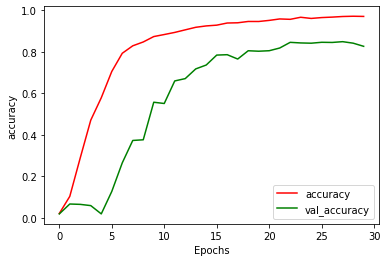

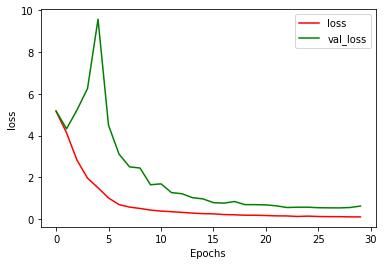

In [ ]:
TrainMobileNetV2ClassificationModel()

In [ ]:
classification_model.save_weights("mobilenet_sgd_dropout_weights.hdf5")
classification_model.save("MobileNetClassifier_dropout_model.h5")

#  MobileNetV2 based Model - Classification and Localization

In [56]:
## Let's prepare the mobilenet, using imagenet as the weights for the classification problem
## One can edit this function to change the model for the classification model.  Rest of the things
## will remain same

def GetMobileNetV2Model():
    base_model= tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', 
                            include_top=False) 

    x= base_model.output
    
    for layer in base_model.layers:
        layer.trainable=False
        
    softmaxHead = tf.keras.layers.GlobalAveragePooling2D()(x)
    softmaxHead = Dense(196, activation="softmax", name="class_label")(softmaxHead)
    
    bboxHead = tensorflow.keras.layers.GlobalMaxPooling2D()(x)
    bboxHead = Dense(4, activation="relu",name="bounding_box")(bboxHead)

    ## We have 2-outputs here 
    model_combined=Model(inputs=base_model.input,outputs=[softmaxHead, bboxHead])
        
    return model_combined

In [57]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 1.0,
    "bounding_box": 0.1,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## This batch size can be lowered based on the availability of RAM, currently kaggle
## GPU was able to fit batches of 32 size
batch_size = 128
dataset_train, dataset_val = createDataSetForBatch(batch_size)

## Let' use a checkpoint callback, saving weights whenever our accurarcy exceeds last reached value and
## only saving the max one in weights
checkpoint = ModelCheckpoint('weights_first_mobilev2_epochs.hdf5', monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


callbacks_list = [checkpoint]

model =  GetMobileNetV2Model()
opt = tensorflow.keras.optimizers.Adam()

## Also we will run for only 20 epochs and then fined tuned these weights
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=20, verbose=1, callbacks=callbacks_list)

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/20
64/64 [==============================] - 141s 2s/step - loss: 1918.8131 - class_label_loss: 5.2215 - bounding_box_loss: 19135.9138 - class_label_categorical_accuracy: 0.0199 - bounding_box_IOU_tensorflow_version: 0.0821 - val_loss: 307.2750 - val_class_label_loss: 4.5182 - val_bounding_box_loss: 3027.5676 - val_class_label_categorical_accuracy: 0.0992 - val_bounding_box_IOU_tensorflow_version: 0.4572
Epoch 2/20
64/64 [==============================] - 129s 2s/step - loss: 247.7716 - class_label_loss: 4.3682 - bounding_box_loss: 2434.0336 - class_label_categorical_accuracy: 0.1371 - bounding_box_IOU_tensorflow_version: 0.5558 - val_loss: 182.4052 - val_class_label_loss: 4.0302 - val_bounding_box_loss: 1783.7490 - val_class_label_categorical_accuracy: 0.1934 - val_bounding_box_IOU_tensorflow_version: 0.6218
Epoch 3/20
64/64 [==============================] - 129s 2s/step - loss: 188.6887 - class_label_loss: 3.8581 

The accuracy of classification is currenly low and needs further improvement. Will skip this model and try other models that can give better performance.

### SSD-Mobile Net V2 for Object Detection

Earlier trial proved MobileNetV2 was able to classify on the data set and with further fine tuning performance could be improved. However since MobileNetV2 alone was not able to give good performance when it comes to localisation, attempted Single Shot Detector (SSD) with Mobilenet as feature extractor.  SSD needs one single shot to detect objects within the image compared to other regional proposal network based approaches like R-CNN(2 stages one for generating region proposal, one for detecting object for each proposal).Hence this single stage approach should be faster compared to two stage methods.
Instead of handcrafting a model from scratch, we used a pretrained model.For training the SSD model with Mobile Net V2 as backbone we used the TensorFlow Object Detection API available in the Tensorflow 2 Model zoo. The detection model pretrained on COCO 2017 data set was used for initializing.  

Prerequisite : 
-Tensorflow Version 2.2 or above. 
Approach:
-Download the Tensorflow models from Tensorflow Model Zoo 
-Download the necessary libraries
- Load images and annotations
- Create Tensor flow records
- Create label map file
- Configure  training /evaluation pipeline
- Identify evaluation metrics :coco
- Train and evaluate the model (subset of data and full data)
Since Tensorflow Object Detection API uses Protobufs to configure model and training parameters, the Protobuf libraries must be downloaded and compiled before using Tensorflow object detection framework. Install pycotools package To use COCO object detection metrics add metrics_set: "coco_detection_metrics" to the eval_config message in the config file.

Source: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/index.html#
Model replicated from Tensorflow Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md


In [ ]:
import six.moves.urllib as urllib
import tarfile
import pathlib

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
#Defining a custom function to set up the environment
def SetupObjectDetectionEnvStage1():
  !pip install tf_slim
  !pip install pycocotools

  if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
      os.chdir('..')
  elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
SetupObjectDetectionEnvStage1()

     |████████████████████████████████| 358kB 10.7MB/s 


In [ ]:
%%bash 
cd models/research
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/drive/My Drive/Colab Notebooks/AIML Capstone/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1618454 sha256=8a1960d5e9e6b3b7d4509a86c70c19fe7a6e9fc898a666fb5b9844ce226d5c35
  Stored in directory: /tmp/pip-ephem-wheel-cache-ats9o3ft/wheels/b7/61/6d/018e159e7bcd2d1a66bcb60f3e80f23ad4071422bb9c9cd5c5
  Created wheel for avro-python3: filename=avro_python3-1.10.1-cp36-none-any.whl size=43734 sha256=8455bcb70040c0cee9fbad837f99b1fc87cc6abc428aa8f382c1f8aa3920d825
  Stored in directory: /root/.cache/pip/wheels/65/fe/90/20d6d6d97223d80d20cb390be636619c536edab5658c12bdba
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=0f196683610de9c72af4c446ddd82b8334ed4a932924753ea0c0ff1e64e5e3c5
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp36-none-any.whl size=78533 sha256=92eca7a

ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.27.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.1 which is incompatible.


In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
def download_model(MODEL):
  MODEL_FILE = MODEL + '.tar.gz'
  DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'
  DEST_DIR = '/models/research/pretrained_model'

  !rm -rf {DEST_DIR}
  os.makedirs(DEST_DIR, exist_ok=True)

  if not (os.path.exists(MODEL_FILE)):
      urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

  tar = tarfile.open(MODEL_FILE)
  tar.extractall()
  tar.close()

In [ ]:
download_model("ssd_mobilenet_v2_320x320_coco17_tpu-8")

In [ ]:
import tensorflow as tf
import PIL.Image
import io
from object_detection.utils import dataset_util
from object_detection.utils import label_map_util

In [ ]:
  def encoder(width, height, filename, encoded_jpg, xmin, ymin, xmax, ymax, classes, classes_text):
      example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
	    'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature('jpeg'.encode('utf8')),
      'image/object/bbox/xmin': dataset_util.float_list_feature([xmin]),
      'image/object/bbox/xmax': dataset_util.float_list_feature([xmax]),
      'image/object/bbox/ymin': dataset_util.float_list_feature([ymin]),
      'image/object/bbox/ymax': dataset_util.float_list_feature([ymax]),
      'image/object/class/text': dataset_util.bytes_feature(classes_text.encode('utf8')),
      'image/object/class/label': dataset_util.int64_list_feature([classes]),
      }))
      return example

In [ ]:

def run_inference_for_single_image_new(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections


  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  #print(output_dict)
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.3,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    print(output_dict['detection_masks_reframed'] )
    
  return output_dict

In [ ]:
def show_inference_new(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image_new(model, image_np)
  #output_dict['detection_boxes'] = output_dict['detection_boxes'] 
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
  #    max_boxes_to_draw=1,
      line_thickness=8)
  img = Image.fromarray(image_np)
  #img1 = img.resize((300,300))
  #img2 = cv2.resize(img1,(300,300))
  #plt.imshow(img2)
  display(img)

  
  # This is the way I'm getting my coordinates
  boxes = output_dict['detection_boxes']
  # get all boxes from an array
  max_boxes_to_draw = boxes.shape[0]
  # get scores to get a threshold
  scores = output_dict['detection_scores']
  # this is set as a default but feel free to adjust it to your needs
  min_score_thresh=.5
  # iterate over all objects found
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
      # 
      if scores is None or scores[i] > min_score_thresh:
          # boxes[i] is the box which will be drawn
          class_name = category_index[output_dict['detection_classes'][i]]['name']
          print ("This box is gonna get used", boxes[i], output_dict['detection_classes'][i])  
  #display(Image.fromarray(image_np))       


**Testing Model Performance on Small DataSet**

In [ ]:
PATH_TO_SAMPLE_TRAIN_RECORD = 'data/sample_train.tfrecord'
PATH_TO_SAMPLE_TEST_RECORD = 'data/sample_test.tfrecord'
PATH_TO_SAMPLE_LAPEL_MAP = 'data/stanford_cars_small_dataset_label_map.pbtxt'

In [ ]:
with open(PATH_TO_SAMPLE_LAPEL_MAP,'w') as output:
  for i, row in label_df.iterrows():
    if(i>3):
      break
    print(i, row.carname)
    output.write('item {{\n  id: {}\n  name: \'{}\'\n}}\n\n'.format(i, row.carname))

1 AM General Hummer SUV 2000
2 Acura RL Sedan 2012
3 Acura TL Sedan 2012


In [ ]:
train_df = annot_train_df
train_df.reset_index(inplace=True)
train_df = pd.merge(train_df, label_df, on="label_index", how="left") 
print(train_df.head())

  ImageFileName   x1  ...  label_index                              carname
0     00001.jpg   39  ...           14                  Audi TTS Coupe 2012
1     00002.jpg   36  ...            3                  Acura TL Sedan 2012
2     00003.jpg   85  ...           91           Dodge Dakota Club Cab 2007
3     00004.jpg  621  ...          134     Hyundai Sonata Hybrid Sedan 2012
4     00005.jpg   14  ...          106  Ford F-450 Super Duty Crew Cab 2012

[5 rows x 7 columns]


In [ ]:
#get the file paths for the classes to that the class name and file anme is included
def get_file_path(dir, carname, image_id):
  car_file_path = os.path.join(dir, carname, image_id)
  return car_file_path

In [ ]:
train_df['file_path'] = train_df.apply(lambda row: get_file_path(train_path, row.carname, row.ImageFileName), axis=1)

In [ ]:
test_df = annot_test_df
test_df.reset_index(inplace=True)
test_df = pd.merge(test_df, label_df, on="label_index", how="left") 
print(test_df.head())

  ImageFileName   x1  ...  label_index                              carname
0     00001.jpg   30  ...          181              Suzuki Aerio Sedan 2007
1     00002.jpg  100  ...          103  Ferrari 458 Italia Convertible 2012
2     00003.jpg   51  ...          145                Jeep Patriot SUV 2012
3     00004.jpg   67  ...          187              Toyota Camry Sedan 2012
4     00005.jpg  140  ...          185             Tesla Model S Sedan 2012

[5 rows x 7 columns]


In [ ]:
test_df['file_path'] = test_df.apply(lambda row: get_file_path(test_path, row.carname, row.ImageFileName), axis=1)

In [ ]:
sample_train = train_df[train_df['label_index'].isin([1,2,3])]

In [ ]:
sample_test = test_df[test_df['label_index'].isin([1,2,3])]

In [ ]:
def tf_sample_record_writer(outFile, df):
  with tf.io.TFRecordWriter(outFile) as writer:
    for i, row in df.iterrows():
      file_path = row.file_path
      with tf.gfile.GFile(file_path, 'rb') as fid:
        encoded_jpg = fid.read()
      encoded_jpg_io = io.BytesIO(encoded_jpg)
      image = PIL.Image.open(encoded_jpg_io)
      width,height = image.size
      xmin = (max(0, row.x1 / width))
      xmax = (min(1.0, row.x2 / width))
      ymin = (max(0, row.y1 / height))
      ymax = (min(1.0, row.y2 / height))
      tf_example = encoder(width, height, file_path, encoded_jpg, xmin, ymin, xmax, ymax, row.label_index, row.carname)
      print(width, height, file_path, xmin, ymin, xmax, ymax, row.label_index, row.carname)
      writer.write(tf_example.SerializeToString())

In [ ]:
tf_sample_record_writer(PATH_TO_SAMPLE_TRAIN_RECORD, sample_train)

900 675 ./data//car_data/car_data/train/Acura TL Sedan 2012/00002.jpg 0.04 0.17185185185185184 0.9644444444444444 0.8696296296296296 3 Acura TL Sedan 2012
700 525 ./data//car_data/car_data/train/AM General Hummer SUV 2000/00163.jpg 0.06571428571428571 0.16 0.9442857142857143 0.8152380952380952 1 AM General Hummer SUV 2000
85 64 ./data//car_data/car_data/train/AM General Hummer SUV 2000/00462.jpg 0.058823529411764705 0.125 0.9764705882352941 0.90625 1 AM General Hummer SUV 2000
94 71 ./data//car_data/car_data/train/AM General Hummer SUV 2000/00522.jpg 0.06382978723404255 0.09859154929577464 1.0 0.9577464788732394 1 AM General Hummer SUV 2000
550 366 ./data//car_data/car_data/train/Acura RL Sedan 2012/00670.jpg 0.17636363636363636 0.13387978142076504 0.8272727272727273 0.8907103825136612 2 Acura RL Sedan 2012
600 450 ./data//car_data/car_data/train/Acura RL Sedan 2012/00691.jpg 0.14 0.42 0.955 0.8355555555555556 2 Acura RL Sedan 2012
700 439 ./data//car_data/car_data/train/AM General Hum

In [ ]:
tf_sample_record_writer(PATH_TO_SAMPLE_TEST_RECORD, sample_test)

1024 683 ./data//car_data/car_data/test/Acura TL Sedan 2012/00043.jpg 0.1640625 0.2518301610541728 0.8564453125 0.8667642752562226 3 Acura TL Sedan 2012
96 64 ./data//car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg 0.11458333333333333 0.203125 0.875 0.9375 1 AM General Hummer SUV 2000
640 450 ./data//car_data/car_data/test/Acura RL Sedan 2012/00183.jpg 0.0421875 0.18222222222222223 0.965625 0.8888888888888888 2 Acura RL Sedan 2012
425 255 ./data//car_data/car_data/test/Acura RL Sedan 2012/00249.jpg 0.06588235294117648 0.10588235294117647 0.9341176470588235 0.8509803921568627 2 Acura RL Sedan 2012
640 480 ./data//car_data/car_data/test/Acura TL Sedan 2012/00282.jpg 0.01875 0.21041666666666667 0.9953125 0.7979166666666667 3 Acura TL Sedan 2012
480 300 ./data//car_data/car_data/test/Acura TL Sedan 2012/00314.jpg 0.10208333333333333 0.3233333333333333 0.825 0.8666666666666667 3 Acura TL Sedan 2012
386 282 ./data//car_data/car_data/test/Acura TL Sedan 2012/00329.jpg 0.0129533678

In [ ]:
# Set output directories and clean up
small_model_dir = 'ssd-mobilenet/training/'
small_output_dir = 'ssd-mobilenet/exported-models/'

!rm -rf {model_dir} {output_dir}
os.makedirs(model_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:

# Edit Pipeline 
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = 'ssd_mobilenet_pipeline.config'
with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = [PATH_TO_SAMPLE_TRAIN_RECORD] 
pipeline.train_input_reader.label_map_path = PATH_TO_SAMPLE_LAPEL_MAP
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = [PATH_TO_SAMPLE_TEST_RECORD] 
pipeline.eval_input_reader[0].label_map_path = PATH_TO_SAMPLE_LAPEL_MAP
pipeline.train_config.fine_tune_checkpoint = 'ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline.train_config.num_steps = 500
pipeline.model.ssd.num_classes = 3
pipeline.eval_config.num_examples = 5

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
print(config_text)
with tf.gfile.GFile( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 4e-05
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.03
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.9997
          center: true
          scale: true
          epsilon: 0.001
          train: true
        }
      }
      override_base_feature_extractor_hyperparams: true
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
 

In [ ]:
!python models/research/object_detection/model_main_tf2.py --logtostderr --pipeline_config_path='ssd_mobilenet_pipeline.config' --model_dir=small_model_dir --num_train_steps=1000

2021-02-15 17:24:35.198413: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 17:24:38.540426: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-15 17:24:38.541486: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-15 17:24:38.565169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-15 17:24:38.566017: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-02-15 17:24:38.566082: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
!python models/research/object_detection/model_main_tf2.py --logtostderr --pipeline_config_path=ssd_mobilenet_pipeline.config --model_dir=small_model_dir --eval_training_data=True --checkpoint_dir=small_model_dir --run_once=True

2021-02-15 17:38:24.887876: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
W0215 17:38:28.034652 140651377547136 model_lib_v2.py:1034] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0215 17:38:28.035146 140651377547136 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0215 17:38:28.035280 140651377547136 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0215 17:38:28.035394 140651377547136 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0215 17:38:28.035542 140651377547136 model_lib_v2.py:1049] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-02-15 17:38:28.044736: I tensorflow/compiler/jit/xla

In [ ]:
!python -u models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=ssd_mobilenet_pipeline.config --trained_checkpoint_dir=small_model_dir --output_directory=small_output_dir

2021-02-15 17:42:49.215912: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 17:42:52.471106: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-15 17:42:52.472188: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-15 17:42:52.496062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-15 17:42:52.496844: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-02-15 17:42:52.496892: I tensorflow/stream_executor/platform/default/dso_lo

**Full DataSet**

With the configurations identified, let us check for the full data set. TF records to be created for the full data set and paths to be updated accordingly

In [ ]:
PATH_TO_TRAIN_RECORD = 'data/train.tfrecord'
PATH_TO_TEST_RECORD = 'data/test.tfrecord'
PATH_TO_LAPEL_MAP = 'data/stanford_cars_label_map_full.pbtxt'

In [ ]:
with open(PATH_TO_LAPEL_MAP,'w') as output:
  for i, row in label_df.iterrows():
    print(i, row.carname)
    output.write('item {{\n  id: {}\n  name: \'{}\'\n}}\n\n'.format(i, row.carname))

1 AM General Hummer SUV 2000
2 Acura RL Sedan 2012
3 Acura TL Sedan 2012
4 Acura TL Type-S 2008
5 Acura TSX Sedan 2012
6 Acura Integra Type R 2001
7 Acura ZDX Hatchback 2012
8 Aston Martin V8 Vantage Convertible 2012
9 Aston Martin V8 Vantage Coupe 2012
10 Aston Martin Virage Convertible 2012
11 Aston Martin Virage Coupe 2012
12 Audi RS 4 Convertible 2008
13 Audi A5 Coupe 2012
14 Audi TTS Coupe 2012
15 Audi R8 Coupe 2012
16 Audi V8 Sedan 1994
17 Audi 100 Sedan 1994
18 Audi 100 Wagon 1994
19 Audi TT Hatchback 2011
20 Audi S6 Sedan 2011
21 Audi S5 Convertible 2012
22 Audi S5 Coupe 2012
23 Audi S4 Sedan 2012
24 Audi S4 Sedan 2007
25 Audi TT RS Coupe 2012
26 BMW ActiveHybrid 5 Sedan 2012
27 BMW 1 Series Convertible 2012
28 BMW 1 Series Coupe 2012
29 BMW 3 Series Sedan 2012
30 BMW 3 Series Wagon 2012
31 BMW 6 Series Convertible 2007
32 BMW X5 SUV 2007
33 BMW X6 SUV 2012
34 BMW M3 Coupe 2012
35 BMW M5 Sedan 2010
36 BMW M6 Convertible 2010
37 BMW X3 SUV 2012
38 BMW Z4 Convertible 2012
39 Bent

In [ ]:
# Edit Pipeline 
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = 'ssd_mobilenet_pipeline.config'
with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = [PATH_TO_TRAIN_RECORD] 
pipeline.train_input_reader.label_map_path = PATH_TO_LAPEL_MAP
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = [PATH_TO_TEST_RECORD] 
pipeline.eval_input_reader[0].label_map_path = PATH_TO_LAPEL_MAP
pipeline.train_config.fine_tune_checkpoint = 'ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0'
#pipeline.post_processing.max_detections_per_class = 5
#pipeline.post_processing.max_total_detections = 5
pipeline.train_config.num_steps = 5000
pipeline.model.ssd.num_classes = 196
pipeline.eval_config.num_examples = 10 
pipeline.model.ssd.loss.classification_weight=10
pipeline.model.ssd.loss.localization_weight=0.2  


config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
print(config_text)
with tf.gfile.GFile( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

In [ ]:
def tf_record_writer(outFile, record, label_df):
  with tf.io.TFRecordWriter(outFile) as writer:
    for row in record:
      file_path = row.image_path()
      with tf.gfile.GFile(file_path, 'rb') as fid:
        encoded_jpg = fid.read()
      encoded_jpg_io = io.BytesIO(encoded_jpg)
      image = PIL.Image.open(encoded_jpg_io)
      width,height = image.size
      label_id = row.label
      carname = label_df.loc[label_id].carname
      xmin = (max(0, row.bbox[0] / width))
      xmax = (min(1.0, (row.bbox[2] + row.bbox[0]) / width))
      ymin = (max(0, row.bbox[1] / height))
      ymax = (min(1.0, (row.bbox[3] + row.bbox[1])/ height))
      #xmin = (max(0, row.bbox[0] / width))
      #xmax = (min(1.0, row.bbox[2] / width))
      #ymin = (max(0, row.bbox[1] / height))
      #ymax = (min(1.0, row.bbox[3] / height))
      tf_example = encoder(width, height, file_path, encoded_jpg, xmin, ymin, xmax, ymax, label_id, carname)
      print(width, height, file_path, xmin, ymin, xmax, ymax, label_id, carname)
      #tf_example = encoder(row.ImageFileName, row.x1, row.y1, row.x2, row.y2, row.label_index, row.carname)
      writer.write(tf_example.SerializeToString())

In [ ]:
tf_record_writer(PATH_TO_TRAIN_RECORD, metadata_train, label_df)

Streaming output truncated to the last 5000 lines.
1920 1080 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/06961.jpg 0.09635416666666667 0.037037037037037035 0.8583333333333333 0.9861111111111112 147 Jeep Liberty SUV 2012
1024 768 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/00299.jpg 0.0234375 0.0859375 0.958984375 0.92578125 147 Jeep Liberty SUV 2012
730 440 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/07532.jpg 0.028767123287671233 0.19545454545454546 0.9616438356164384 0.975 147 Jeep Liberty SUV 2012
1920 1080 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/04654.jpg 0.12291666666666666 0.03333333333333333 0.875 0.9981481481481481 147 Jeep Liberty SUV 2012
720 405 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/02779.jpg 0.19722222222222222 0.18765432098765433 0.8236111111111111 0.762962962962963 147 Jeep Liberty SUV 2012
750 469 ./data//car_data/car_data/train/Jeep Liberty SUV 2012/06732.jpg 0.034666666666666665 0.06609808102345416 0.908 0.878

In [ ]:
tf_record_writer(PATH_TO_TEST_RECORD, metadata_test, label_df)

Streaming output truncated to the last 5000 lines.
500 375 ./data//car_data/car_data/test/Chrysler Town and Country Minivan 2012/05588.jpg 0.05 0.09333333333333334 0.884 0.6906666666666667 78 Chrysler Town and Country Minivan 2012
900 600 ./data//car_data/car_data/test/Chrysler Town and Country Minivan 2012/07586.jpg 0.13111111111111112 0.31 0.9111111111111111 0.92 78 Chrysler Town and Country Minivan 2012
320 240 ./data//car_data/car_data/test/Chrysler Town and Country Minivan 2012/05821.jpg 0.140625 0.26666666666666666 0.86875 0.7583333333333333 78 Chrysler Town and Country Minivan 2012
424 360 ./data//car_data/car_data/test/Chrysler Town and Country Minivan 2012/00986.jpg 0.0589622641509434 0.08611111111111111 0.9268867924528302 0.8027777777777778 78 Chrysler Town and Country Minivan 2012
424 360 ./data//car_data/car_data/test/Chrysler Town and Country Minivan 2012/02775.jpg 0.16745283018867924 0.22777777777777777 0.8349056603773585 0.8083333333333333 78 Chrysler Town and Country Mi

In [ ]:
# Set output directories and clean up
full_model_dir = '/ssd-mobilenet/training/'
full_output_dir = '/ssd-mobilenet/exported-models/'

!rm -rf {full_model_dir} {full_output_dir}
os.makedirs(full_model_dir, exist_ok=True)
os.makedirs(full_output_dir, exist_ok=True)


In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
!python models/research/object_detection/model_main_tf2.py --logtostderr --pipeline_config_path='ssd_mobilenet_pipeline.config' --model_dir=full_model_dir --num_train_steps=8000

2021-02-18 09:58:21.985017: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 09:58:25.403607: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-18 09:58:25.404819: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-18 09:58:25.465173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-18 09:58:25.466019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-02-18 09:58:25.466070: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
!python models/research/object_detection/model_main_tf2.py --logtostderr --pipeline_config_path=ssd_mobilenet_pipeline.config --model_dir=full_model_dir --eval_training_data=True --checkpoint_dir=full_model_dir --run_once=True 

2021-02-18 11:04:47.880369: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
W0218 11:04:51.506277 139784127735680 model_lib_v2.py:1034] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0218 11:04:51.506548 139784127735680 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0218 11:04:51.506700 139784127735680 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0218 11:04:51.506883 139784127735680 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0218 11:04:51.507083 139784127735680 model_lib_v2.py:1049] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-02-18 11:04:51.516962: I tensorflow/compiler/jit/xla

In [ ]:
#Convert the checkpoint to frozen graph (.pb file)
!python -u models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=ssd_mobilenet_pipeline.config --trained_checkpoint_dir=full_model_dir --output_directory=full_output_dir

2021-02-18 11:00:02.661428: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-18 11:00:06.783694: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-18 11:00:06.786722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-18 11:00:06.813351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-18 11:00:06.814154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-02-18 11:00:06.814204: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
import time
import tensorflow as tf # Added as colab instance often crash
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils


# Label Map path
PATH_TO_LABELS = "data/stanford_cars_label_map_full.pbtxt"
# Saved model path
PATH_TO_SAVED_MODEL = os.path.join("full_output_dir", "saved_model")

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# Set category index
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Loading model...Done! Took 18.555947303771973 seconds


Summary: For training the SSD model with Mobile Net V2 as backbone we used the TensorFlow Object Detection API available in the Tensorflow 2 Model zoo. with pretrained weights from COCO 2017 data set for initializing. toTo begin with we started with a subset of data and then with the full data set. Experimented with the various parameters and improved the performance.Parameters changed included but not limited to the following:
- Number of classes model.ssd.num_classes(to 196 based on the classes in the data)
- Batch size reduced from 256 to 24
- Initializer - Box_predictor:initializer=random_normal_initializer
- Classification loss changed from Sigmoid to sigmoid focal with changes in gamma and alpha parameters . 
- Optimizer changed from rms prop to adam optimizer
- Loss weightages for Classification loss and localisation losses adjusted.

For the subset of data mean average precision values @IOU 0.5 were greater than 0.3 on an average,however on full data set it didnot yield good results. Though we were able to get improved performance in terms of reduced loss,  the classification was not appropriate and the bounding boxes were not getting plotted correctly.On a smaller data though mean Average Precision values were  Hence decided not to pursue with this Tensorflow object detection API.



# Yolo V3(anchorless)  Based Model
We will now train the model using Yolo V3 architecure  and tranfer learning with Yolo V3 weigts . We will also first try to find the right learning rate using the lr-finder and then use learning rate in for fine-tuning pre-trained network

In [171]:
## Let's prepare the YoloV3 model, using yolo V3 weights  for the classification and Regression problem


# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

 
def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x
 
def make_yolov3_model():
    
    input_image = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    
    #input_image = Input(shape=(None, None, 3))
    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94

    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
    
    
    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
   # x = concatenate([x, skip_36])


    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
    
    softmaxHead = tf.keras.layers.GlobalAveragePooling2D()(x)
   # softmaxHead = Flatten()(softmaxHead)
    softmaxHead = Dense(196, activation="softmax", name="class_label")(softmaxHead)
    
    bboxHead = tensorflow.keras.layers.GlobalMaxPooling2D()(x)
   # bboxHead = Dense(64, activation="relu")(bboxHead)
    bboxHead = Dense(4, activation="relu",name="bounding_box")(bboxHead)
    
    model = Model(input_image, outputs=[softmaxHead, bboxHead])

    return model

class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')
 
	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]
 
	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				conv_layer.trainable=False                
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) # bias
					gamma = self.read_bytes(size) # scale
					mean  = self.read_bytes(size) # mean
					var   = self.read_bytes(size) # variance
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))
 
	def reset(self):
		self.offset = 0
 
# define the model
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader("../input/yolov3-weights/yolov3.weights")
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('model.h5')



loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [172]:
from keras import models
model = models.load_model('model.h5')


In [173]:
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 10.0,
    "bounding_box": 0.01,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## Using the adam optimizer
opt = tensorflow.keras.optimizers.Adam()
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 300, 300, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, 300, 300, 32) 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, 300, 300, 32) 0           bnorm_0[0][0]                    
____________________________________________________________________________________________

Epoch 1/5
255/255 [==============================] - 155s 583ms/step - loss: 356.8367 - class_label_loss: 5.2780 - bounding_box_loss: 30405.6753 - class_label_categorical_accuracy: 0.0042 - bounding_box_IOU_tensorflow_version: 0.0300
Epoch 2/5
255/255 [==============================] - 150s 586ms/step - loss: 357.4462 - class_label_loss: 5.2781 - bounding_box_loss: 30466.5233 - class_label_categorical_accuracy: 0.0047 - bounding_box_IOU_tensorflow_version: 0.0318
Epoch 3/5
255/255 [==============================] - 149s 583ms/step - loss: 359.0344 - class_label_loss: 5.2781 - bounding_box_loss: 30625.3173 - class_label_categorical_accuracy: 0.0057 - bounding_box_IOU_tensorflow_version: 0.0306
Epoch 4/5
255/255 [==============================] - 148s 578ms/step - loss: 349.5145 - class_label_loss: 5.2889 - bounding_box_loss: 29662.5421 - class_label_categorical_accuracy: 0.0040 - bounding_box_IOU_tensorflow_version: 0.0327
Epoch 5/5
255/255 [==============================] - 147s 575ms/

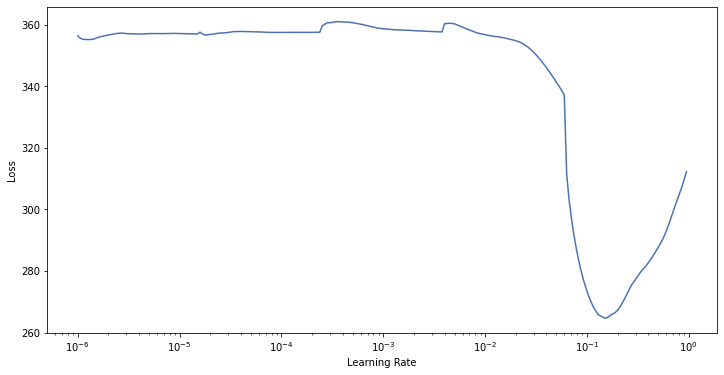

In [174]:
## Integrate LRFinder
#from LRFinder.keras_callback import LRFinder
# 3. Fit using Callback and find the appropriate lr-rangle
lr_finder = LRFinder(min_lr=1e-6, max_lr=1)
callbacks_list = [lr_finder]

batch_size = 32
dataset_train, _ = createDataSetForBatch(batch_size)

## Let's first fit this for 10 epochs and find the learning rate range 
model.fit(dataset_train, epochs=5, verbose=1, callbacks=callbacks_list)  #--------NEED TO UNCOMMENT

**We will use the above found learning rate range and further fine-tune the pre-trained network**

As you see from above, loss starts increasing drastically after 0.1 learning rate, so this is our max_lr, and minimum can be chosen 10 times smaller. So we can pick 0.01 as our starting learning rate for the fine tuning of the network

In [175]:
## This code has been taken from public repository: 

from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [176]:
from keras.callbacks import ModelCheckpoint
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 10.0,
    "bounding_box": 0.01,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## This batch size can be lowered based on the availability of RAM, currently kaggle
## GPU was able to fit batches of 32 size
batch_size = 28
dataset_train, dataset_val = createDataSetForBatch(batch_size)

## Tried using cyclic learning rate, but it didn't worked so picking the normal

#clr = CyclicLR(mode='triangular', base_lr=0.01,  ## These are the rates obtained from LRFinder
#               max_lr=0.1,
#               step_size= 8 * (len(X_train) // batch_size))

## Let' use a checkpoint callback, saving weights whenever our accurarcy exceeds last reached value and
## only saving the max one in weights
checkpoint = ModelCheckpoint('weights_first_20_epochs_YOLO.hdf5', monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_label_categorical_accuracy", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'max')

callbacks_list = [checkpoint, reduce_lr]

#model =  GetEfficientNetB5Model()
opt = tensorflow.keras.optimizers.Adam(lr=0.01)

## Also we will run for only 20 epochs and then fined tuned these weights
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=20, verbose=1, callbacks=callbacks_list)



Epoch 1/20
291/291 [==============================] - 226s 757ms/step - loss: 177.3054 - class_label_loss: 5.4353 - bounding_box_loss: 12295.2342 - class_label_categorical_accuracy: 0.0040 - bounding_box_IOU_tensorflow_version: 0.4012 - val_loss: nan - val_class_label_loss: nan - val_bounding_box_loss: 27666.3438 - val_class_label_categorical_accuracy: 0.0055 - val_bounding_box_IOU_tensorflow_version: 0.0361
Epoch 2/20
291/291 [==============================] - 219s 753ms/step - loss: 59.6798 - class_label_loss: 5.2768 - bounding_box_loss: 691.1443 - class_label_categorical_accuracy: 0.0071 - bounding_box_IOU_tensorflow_version: 0.7696 - val_loss: 57.9574 - val_class_label_loss: 5.2597 - val_bounding_box_loss: 536.0588 - val_class_label_categorical_accuracy: 0.0078 - val_bounding_box_IOU_tensorflow_version: 0.7202
Epoch 3/20
291/291 [==============================] - 221s 759ms/step - loss: 55.4737 - class_label_loss: 5.1140 - bounding_box_loss: 433.3571 - class_label_categorical_accur

In [177]:
## LR was reduced to 6.399999165296323e-07
model.save_weights("car_obj_detection_fined_tuned_yolo.hdf5")

### Progressive Unfreezing
We will now unfreeze the layers and train the layers again for some epochs. 

In [178]:
## This part is implementing the progressive unfreezing of 10 layers each at a time
## and then training for 1 epoch. This the last tuning method, this thing will take time as
## this will run for close to 50 epochs

## Let's load the weights found in previous 

## You can skip above first part of tuning and directly start further tuning-from here 
#model =  GetEfficientNetB5Model()
model.load_weights("car_obj_detection_fined_tuned_yolo.hdf5")
from keras.callbacks import ModelCheckpoint
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    ## As bounding box is quite good, we can concentrate on classification
    ## and further reduce the effect of bounding-boxes
    "class_label": 20.0,
    "bounding_box": 0.001,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

total_layers = len(model.layers)

from tqdm import tqdm

opt = tensorflow.keras.optimizers.Adam(lr=6.399999165296323e-04)
clr = CyclicLR(mode='triangular', base_lr=6.399999165296323e-07,  ## These are the rates obtained from LRFinder
               max_lr=0.01,
               step_size= 8 * (len(X_train) // batch_size))

checkpoint = ModelCheckpoint('weights_first_20_epochs.hdf5', monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_label_categorical_accuracy", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'max')

callbacks_list = [checkpoint, reduce_lr]

batch_size = 28
dataset_train, dataset_val = createDataSetForBatch(batch_size)


model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)

for i in np.arange(2, total_layers, 20):
    print("Iteration No. = ", i)
    layer_num = -1*i
    for layer in model.layers[layer_num:0]:
        layer.trainable=True
    history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=1, verbose=1, callbacks=callbacks_list)


Iteration No. =  2
291/291 [==============================] - 224s 751ms/step - loss: 54.4864 - class_label_loss: 2.7126 - bounding_box_loss: 233.3915 - class_label_categorical_accuracy: 0.2903 - bounding_box_IOU_tensorflow_version: 0.8545 - val_loss: 53.5155 - val_class_label_loss: 2.6654 - val_bounding_box_loss: 208.1187 - val_class_label_categorical_accuracy: 0.2946 - val_bounding_box_IOU_tensorflow_version: 0.8490
Iteration No. =  22
291/291 [==============================] - 216s 741ms/step - loss: 54.4221 - class_label_loss: 2.7087 - bounding_box_loss: 247.7630 - class_label_categorical_accuracy: 0.2916 - bounding_box_IOU_tensorflow_version: 0.8486 - val_loss: 51.9302 - val_class_label_loss: 2.5851 - val_bounding_box_loss: 227.7416 - val_class_label_categorical_accuracy: 0.3100 - val_bounding_box_IOU_tensorflow_version: 0.8428
Iteration No. =  42
291/291 [==============================] - 221s 762ms/step - loss: 53.6364 - class_label_loss: 2.6694 - bounding_box_loss: 249.1472 - c

### Load the fine-tuned model and find the test accuracy and IOU for the bounding boxes

In [179]:
#model =  GetEfficientNetB5Model()
## Find the accuracy based on fined tuned weights
model.load_weights("car_obj_detection_fined_tuned_yolo.hdf5")
Y_true_label , Y_pred_label, Y_true_bbox, Y_pred_bbox = batchWisePrediction(model, metadata_test, 64, labelEncode)
print("Test Accuracy = ", accuracy_score(Y_true_label, Y_pred_label))
print("Test IOU = ", IOU(Y_true_bbox, Y_pred_bbox))

100%|██████████| 125/125 [02:42<00:00,  1.30s/it]

Test Accuracy =  0.30008705384902373
Test IOU =  0.8557


In [ ]:
# unfreezed the layers and train the layers again for some epochs and saved the new weights and recheck the model
model.save_weights("car_obj_detection_fined_tuned_yolo_3.hdf5")
model.save("car_obj_detection_fined_tuned_yolo3.h5")

 Load the fine-tuned model and find the test accuracy and IOU for the bounding boxes

In [64]:
## Find the accuracy based on fined tuned weights
model.load_weights("car_obj_detection_fined_tuned_yolo_3.hdf5")
Y_true_label , Y_pred_label, Y_true_bbox, Y_pred_bbox = batchWisePrediction(model, metadata_test, 64, labelEncode)
print("Test Accuracy = ", accuracy_score(Y_true_label, Y_pred_label))
print("Test IOU = ", IOU(Y_true_bbox, Y_pred_bbox))

100%|██████████| 125/125 [03:35<00:00,  1.73s/it]

Test Accuracy =  0.4003233428678025
Test IOU =  0.7617


Inference for Yolo:  Classification accuracy  is very low when compared to the other models  though the  IOU of bondary boxes is good    

# EfficientNetB5 Based Model
We will now try using efficientnetb5. We will also first try to find the right learning rate using the lr-finder and then use learning rate in for fine-tuning pre-trained network

### Finding the right Learning Rate
This section implements the learning rate finder utility and will be used to determine the right learning rate. This is based on Leslie Smith’s paper https://arxiv.org/abs/1506.01186.  

The automatic learning rate finder algorithm works like this:

- Step #1: We start by defining an upper and lower bound on our learning rate. The lower bound should be very small (1e-10) and the upper bound should be very large (1e+1). At 1e-10 the learning rate will be too small for our network to learn, while at 1e+1 the learning rate will be too large and our model will overfit. Both of these are okay, and in fact, that’s what we hope to see!
- Step #2: We then start training our network, starting at the lower bound. After each batch update, we exponentially increase our learning rate. We log the loss after each batch update as well.
- Step #3: Training continues, and therefore the learning rate continues to increase until we hit our maximum learning rate value. Typically, this entire training process/learning rate increase only takes 1-5 epochs.
- Step #4: After training is complete we plot a smoothed loss over time, enabling us to see when the learning rate is both: Just large enough for loss to decrease. And too large, to the point where loss starts to increase.

In [54]:
# Following repository was used for the code base  https://github.com/WittmannF/LRFinder
from keras.callbacks import Callback
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

class LRFinder(Callback):
    def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
                 reload_weights=True, batches_lr_update=5):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.mom = mom
        self.reload_weights = reload_weights
        self.batches_lr_update = batches_lr_update
        if stop_multiplier is None:
            self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
                                                       # 10 if mom=0
        else:
            self.stop_multiplier = stop_multiplier
        
    def on_train_begin(self, logs={}):
        p = self.params
        try:
            n_iterations = p['epochs']*p['samples']//p['batch_size']
        except:
            n_iterations = p['steps']*p['epochs']
            
        self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
                                           num=n_iterations//self.batches_lr_update+1)
        self.losses=[]
        self.iteration=0
        self.best_loss=0
        if self.reload_weights:
            self.model.save_weights('tmp.hdf5')
        
    
    def on_batch_end(self, batch, logs={}):
        loss = logs.get('loss')
        
        if self.iteration!=0: # Make loss smoother using momentum
            loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
        if self.iteration==0 or loss < self.best_loss: 
                self.best_loss = loss
                
        if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
            if self.reload_weights:
                self.model.load_weights('tmp.hdf5')
          
            lr = self.learning_rates[self.iteration//self.batches_lr_update]            
            K.set_value(self.model.optimizer.lr, lr)

            self.losses.append(loss)            

        #if loss > self.best_loss*self.stop_multiplier: # Stop criteria
            #self.model.stop_training = True
                
        self.iteration += 1
    
    def on_train_end(self, logs=None):
        if self.reload_weights:
                self.model.load_weights('tmp.hdf5')
                
        plt.figure(figsize=(12, 6))
        plt.plot(self.learning_rates[:len(self.losses)], self.losses)
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")
        plt.xscale('log')
        plt.show()


In [50]:
## Let's prepare the EfficientNetB5, using imagenet as the weights for the classification problem
## One can edit this function to change the model for the classification model.  Rest of the things
## will remain same

from tensorflow.keras.applications.inception_v3 import InceptionV3
def GetEfficientNetB5Model():
    base_model= tf.keras.applications.EfficientNetB5(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', 
                            include_top=False) 

    #base_model= InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', 
     #                       include_top=False) 

    x= base_model.output
    
    for layer in base_model.layers:
        layer.trainable=False
        
    softmaxHead = tf.keras.layers.GlobalAveragePooling2D()(x)
    softmaxHead = Dense(196, activation="softmax", name="class_label")(softmaxHead)
    
    bboxHead = tensorflow.keras.layers.GlobalMaxPooling2D()(x)
    bboxHead = Dense(4, activation="relu",name="bounding_box")(bboxHead)

    ## We have 2-outputs here 
    model_combined=Model(inputs=base_model.input,outputs=[softmaxHead, bboxHead])
        
    ## Enable the training of batch-normalization layer, there is bug in batch-normalization
    ## layer which making accuracy to be weird during the validation inference. So I am 
    ## enable the training of the batch-layer again
    for layer in base_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False
        
    return model_combined

In [58]:
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 10.0,
    "bounding_box": 0.01,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## Using the adam optimizer
opt = tensorflow.keras.optimizers.Adam()
model = GetEfficientNetB5Model()
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
model.summary()

115269632/115263384 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 300, 300, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 300, 300, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 301, 301, 3)  0           normalization[0][0]              
_________________________

Epoch 1/5
255/255 [==============================] - 284s 1s/step - loss: 351.3411 - class_label_loss: 5.3115 - bounding_box_loss: 29822.5879 - class_label_categorical_accuracy: 0.0066 - bounding_box_IOU_tensorflow_version: 0.0283
Epoch 2/5
255/255 [==============================] - 267s 1s/step - loss: 350.6698 - class_label_loss: 5.3116 - bounding_box_loss: 29755.3775 - class_label_categorical_accuracy: 0.0070 - bounding_box_IOU_tensorflow_version: 0.0284
Epoch 3/5
255/255 [==============================] - 265s 1s/step - loss: 328.4784 - class_label_loss: 5.3099 - bounding_box_loss: 27537.9529 - class_label_categorical_accuracy: 0.0058 - bounding_box_IOU_tensorflow_version: 0.0210
Epoch 4/5
255/255 [==============================] - 266s 1s/step - loss: 208.5986 - class_label_loss: 5.2621 - bounding_box_loss: 15597.7313 - class_label_categorical_accuracy: 0.0105 - bounding_box_IOU_tensorflow_version: 0.1664
Epoch 5/5
255/255 [==============================] - 269s 1s/step - loss: 22

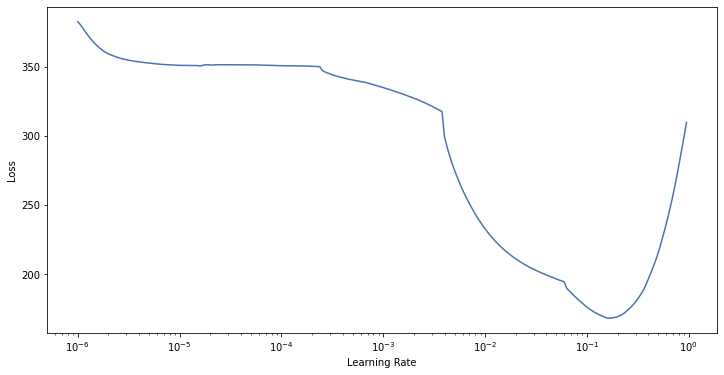

In [59]:
## Integrate LRFinder
#from LRFinder.keras_callback import LRFinder
# 3. Fit using Callback and find the appropriate lr-rangle
lr_finder = LRFinder(min_lr=1e-6, max_lr=1)
callbacks_list = [lr_finder]

batch_size = 32
dataset_train, _ = createDataSetForBatch(batch_size)

## Let's first fit this for 10 epochs and find the learning rate range 
model.fit(dataset_train, epochs=5, verbose=1, callbacks=callbacks_list)

As you see from above, loss starts increasing drastically after 0.1 learning rate, so this is our max_lr, and minimum can be chosen 10 times smaller. So we can pick 0.01 as our starting learning rate for the fine tuning of the network

**We will use the above found learning rate range and further fine-tune the pre-trained network**

In [61]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 10.0,
    "bounding_box": 0.01,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## This batch size can be lowered based on the availability of RAM, currently kaggle
## GPU was able to fit batches of 32 size
batch_size = 28
dataset_train, dataset_val = createDataSetForBatch(batch_size)

## Tried using cyclic learning rate, but it didn't worked so picking the normal

#clr = CyclicLR(mode='triangular', base_lr=0.01,  ## These are the rates obtained from LRFinder
#               max_lr=0.1,
#               step_size= 8 * (len(X_train) // batch_size))

## Let' use a checkpoint callback, saving weights whenever our accurarcy exceeds last reached value and
## only saving the max one in weights
checkpoint = ModelCheckpoint('weights_first_20_epochs.hdf5', monitor='val_class_label_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_label_categorical_accuracy", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'max')

callbacks_list = [checkpoint, reduce_lr]

model =  GetEfficientNetB5Model()
opt = tensorflow.keras.optimizers.Adam(lr=0.01)

## Also we will run for only 20 epochs, probably in this only we might fine tune this. 
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=20, verbose=1, callbacks=callbacks_list)

Epoch 1/20
291/291 [==============================] - 363s 1s/step - loss: 76.7360 - class_label_loss: 4.6910 - bounding_box_loss: 2982.6390 - class_label_categorical_accuracy: 0.1187 - bounding_box_IOU_tensorflow_version: 0.6001 - val_loss: 46.9701 - val_class_label_loss: 3.7290 - val_bounding_box_loss: 968.0161 - val_class_label_categorical_accuracy: 0.2163 - val_bounding_box_IOU_tensorflow_version: 0.6022

Epoch 00001: val_class_label_categorical_accuracy improved from -inf to 0.21627, saving model to weights_first_20_epochs.hdf5
Epoch 2/20
291/291 [==============================] - 337s 1s/step - loss: 21.1979 - class_label_loss: 1.3576 - bounding_box_loss: 762.2296 - class_label_categorical_accuracy: 0.6514 - bounding_box_IOU_tensorflow_version: 0.7151 - val_loss: 27.6854 - val_class_label_loss: 1.9758 - val_bounding_box_loss: 792.7137 - val_class_label_categorical_accuracy: 0.5272 - val_bounding_box_IOU_tensorflow_version: 0.6533

Epoch 00002: val_class_label_categorical_accuracy

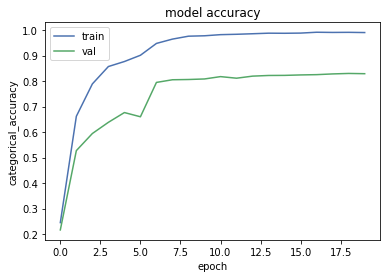

In [62]:
plt.plot(history.history['class_label_categorical_accuracy'])
plt.plot(history.history['val_class_label_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As we see from graph after 7 epochs, accuracy becomes stagnant. Also there is some overfitting.

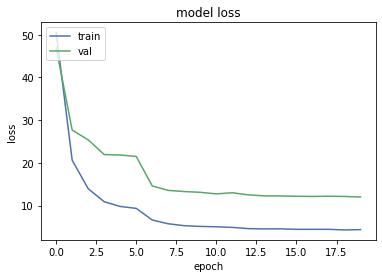

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
## LR was reduced to 1.2799998785339995e-07
model.save_weights("car_obj_detection_fined_tuned_1.hdf5")

### Progressive Unfreezing
We will now unfreeze the layers and train the layers again for some epochs. 

In [65]:
## This part is implementing the progressive unfreezing of 40 layers each at a time
## and then training for 1 epoch. This the last tuning method, this thing will take time as
## this will run for close to 50 epochs

## Let's load the weights found in previous 

## You can skip above first part of tuning and directly start further tuning-from here 
model =  GetEfficientNetB5Model()
model.load_weights("car_obj_detection_fined_tuned_1.hdf5")
from keras.callbacks import ModelCheckpoint
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    ## As bounding box is quite good, we can concentrate on classification
    ## and further reduce the effect of bounding-boxes
    "class_label": 20.0,
    "bounding_box": 0.001,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

total_layers = len(model.layers)

from tqdm import tqdm

opt = tensorflow.keras.optimizers.Adam(lr=1.2799998785339995e-06)
clr = CyclicLR(mode='triangular', base_lr=6.399999165296323e-07,  ## These are the rates obtained from LRFinder
               max_lr=0.01,
               step_size= 8 * (len(X_train) // batch_size))

checkpoint = ModelCheckpoint('weights_second_progunfreeze_epochs.hdf5', monitor='val_class_label_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_label_categorical_accuracy", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'max')

callbacks_list = [checkpoint, reduce_lr]

batch_size = 28
dataset_train, dataset_val = createDataSetForBatch(batch_size)


model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)

for i in np.arange(2, total_layers, 40):
    print("Iteration No. = ", i)
    layer_num = -1*i
    for layer in model.layers[layer_num:0]:
        layer.trainable=True
    history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=1, verbose=1, callbacks=callbacks_list)


Iteration No. =  2
291/291 [==============================] - 365s 1s/step - loss: 1.0073 - class_label_loss: 0.0304 - bounding_box_loss: 399.3381 - class_label_categorical_accuracy: 0.9933 - bounding_box_IOU_tensorflow_version: 0.7941 - val_loss: 15.8425 - val_class_label_loss: 0.7707 - val_bounding_box_loss: 427.6464 - val_class_label_categorical_accuracy: 0.8286 - val_bounding_box_IOU_tensorflow_version: 0.7537

Epoch 00001: val_class_label_categorical_accuracy improved from -inf to 0.82863, saving model to weights_second_progunfreeze_epochs.hdf5
Iteration No. =  42
291/291 [==============================] - 344s 1s/step - loss: 1.0930 - class_label_loss: 0.0350 - bounding_box_loss: 392.5833 - class_label_categorical_accuracy: 0.9901 - bounding_box_IOU_tensorflow_version: 0.7934 - val_loss: 15.8529 - val_class_label_loss: 0.7713 - val_bounding_box_loss: 427.4493 - val_class_label_categorical_accuracy: 0.8286 - val_bounding_box_IOU_tensorflow_version: 0.7520

Epoch 00001: val_class_l

### Load the fine-tuned model and find the test accuracy and IOU for the bounding boxes

In [66]:
model =  GetEfficientNetB5Model()
## Find the accuracy based on fined tuned weights
model.load_weights("weights_second_progunfreeze_epochs.hdf5")
Y_true_label , Y_pred_label, Y_true_bbox, Y_pred_bbox = batchWisePrediction(model, metadata_test, 64, labelEncode)
print("Test Accuracy = ", accuracy_score(Y_true_label, Y_pred_label))
print("Test IOU = ", IOU(Y_true_bbox, Y_pred_bbox))

100%|██████████| 125/125 [02:51<00:00,  1.37s/it]

Test Accuracy =  0.8291257306305186
Test IOU =  0.7489


### Visualizing the predicted output on test-images 

In [60]:
def ModelPredictionOnImage(model, image, Y_true_bbox=None, Y_true_label=None):
    global labelEncode
    
    scaled_img, _, scaled_bbox = data_augment.resize_and_rescale(image, Y_true_bbox, Y_true_label)
                                                                 
    X = tf.reshape(scaled_img, (1,IMAGE_SIZE, IMAGE_SIZE, 3))
    Y_pred_bbox = None
    Y_pred_label, Y_pred_bbox = model.predict(X)
        
    Y_pred_label_max = np.argmax(Y_pred_label[0])
    Y_pred_label_max = Y_pred_label_max.astype(np.int32)
    Y_pred_label = labelEncode.inverse_transform(np.reshape(Y_pred_label_max, (1,-1)))
    
    image_height, image_width, _ = image.shape

    bbox = Y_pred_bbox[0]
    x0 = int(bbox[0] * image_width / IMAGE_SIZE) # Scale the BBox
    y0 = int(bbox[1] * image_height / IMAGE_SIZE)

    x1 = int((bbox[0] + bbox[2]) * image_width / IMAGE_SIZE)
    y1 = int((bbox[1] + bbox[3]) * image_height / IMAGE_SIZE)
    
    x1 = x1 - x0
    y1 = y1 - y0
    return Y_pred_label, (x0,y0,x1,y1)

In [80]:
model =  GetEfficientNetB5Model()
## Find the accuracy based on fined tuned weights
model.load_weights("weights_second_progunfreeze_epochs.hdf5")

C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


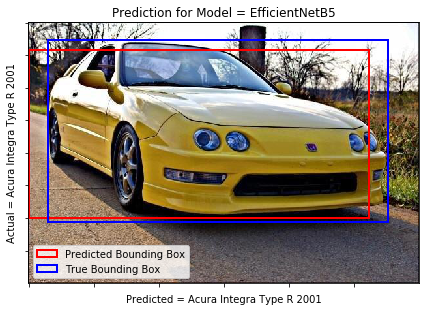

In [81]:
## Let's pick any random image
m = metadata_test[10]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

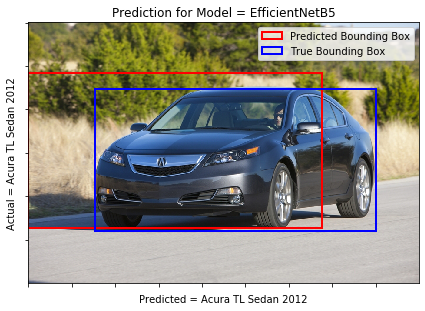

In [82]:
m = metadata_test[100]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

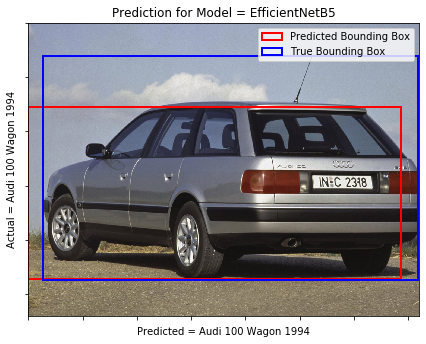

In [84]:
m = metadata_test[500]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

**If you look at above visualizations, labels were correct, but there is some issue with the bounding boxes. It seems that starting coordinate is always turning to be zero and hence these predicted bounding boxes seems to be shifted to left side. This is clearly an issue. Further investigation was done to understand what can possibly the issue with EfficientNetb5**

## Further Experimentation on EfficientNetB5 

Issue was with the layer **GlobalMaxPooling2D** added prior to predicting the bounding boxes. Adding this layer results in loosing the spation information on the image and hence the bounding boxes were shifted. Instead of using this layer, just flatten the all previous outputs and directly use this to predict the bounding boxes. 

In [86]:
def GetEfficientNetB5Model_v2():
    base_model= tf.keras.applications.EfficientNetB5(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', 
                            include_top=False) 

    x= base_model.output
    
    for layer in base_model.layers:
        layer.trainable=False
        
    softmaxHead = tf.keras.layers.GlobalAveragePooling2D()(x)
    softmaxHead = Dense(196, activation="softmax", name="class_label")(softmaxHead)
    
    #bboxHead = tensorflow.keras.layers.GlobalMaxPooling2D()(x)
    bboxHead = tf.keras.layers.Flatten()(x)
    bboxHead = Dense(4, activation="linear",name="bounding_box")(bboxHead)

    ## We have 2-outputs here 
    model_combined=Model(inputs=base_model.input,outputs=[softmaxHead, bboxHead])
        
    ## Enable the training of batch-normalization layer, there is bug in batch-normalization
    ## layer which making accuracy to be weird during the validation inference. So I am 
    ## enable the training of the batch-layer again
    for layer in base_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False
        
    return model_combined

In [31]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    "class_label": 10.0,
    "bounding_box": 0.1,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

## This batch size can be lowered based on the availability of RAM, currently kaggle
## GPU was able to fit batches of 32 size
batch_size = 28
dataset_train, dataset_val = createDataSetForBatch(batch_size)

## Tried using cyclic learning rate, but it didn't worked so picking the normal

#clr = CyclicLR(mode='triangular', base_lr=0.01,  ## These are the rates obtained from LRFinder
#               max_lr=0.1,
#               step_size= 8 * (len(X_train) // batch_size))

## Let' use a checkpoint callback, saving weights whenever our accurarcy exceeds last reached value and
## only saving the max one in weights
checkpoint = ModelCheckpoint('weights_first_20_epochs.hdf5', monitor='val_class_label_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_label_categorical_accuracy", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'max')

callbacks_list = [checkpoint, reduce_lr]

model =  GetEfficientNetB5Model_v2()
#model.layers[-2].trainable = False ## First train the bbox
opt = tensorflow.keras.optimizers.Adam(lr=0.01)

## Also we will run for only 20 epochs, probably in this only we might fine tune this. 
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
history = model.fit(dataset_train, validation_data=dataset_val,
          epochs=20, verbose=1, callbacks=callbacks_list)

115269632/115263384 [==============================] - 3s 0us/step
Epoch 1/20
291/291 [==============================] - 364s 1s/step - loss: 441.4872 - class_label_loss: 5.4828 - bounding_box_loss: 3866.5899 - class_label_categorical_accuracy: 0.0350 - bounding_box_IOU_tensorflow_version: 0.5438 - val_loss: 162.5931 - val_class_label_loss: 6.9714 - val_bounding_box_loss: 928.7936 - val_class_label_categorical_accuracy: 0.0138 - val_bounding_box_IOU_tensorflow_version: 0.6171

Epoch 00001: val_class_label_categorical_accuracy improved from -inf to 0.01380, saving model to weights_first_20_epochs.hdf5
Epoch 2/20
291/291 [==============================] - 335s 1s/step - loss: 121.6489 - class_label_loss: 4.4096 - bounding_box_loss: 775.5327 - class_label_categorical_accuracy: 0.1540 - bounding_box_IOU_tensorflow_version: 0.7016 - val_loss: 120.6294 - val_class_label_loss: 4.3807 - val_bounding_box_loss: 768.2256 - val_class_label_categorical_accuracy: 0.1522 - val_bounding_box_IOU_tensor

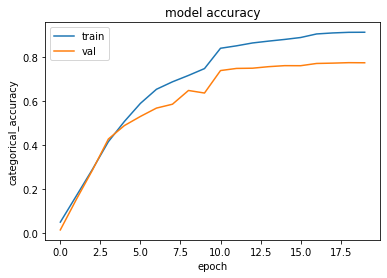

In [35]:
plt.plot(history.history['class_label_categorical_accuracy'])
plt.plot(history.history['val_class_label_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

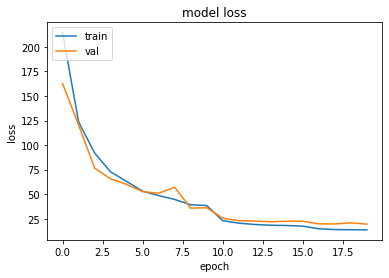

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**As we see from above IOU is really good close to 0.9 but accuracy has reduced little to 0.7728, we will fine tune this further, but let's first visualize the prediction outputs to see whether bounding boxes are corrected or not.**

In [87]:
model =  GetEfficientNetB5Model_v2()
## Find the accuracy based on fined tuned weights
model.load_weights("weights_first_20_epochs.hdf5")

C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


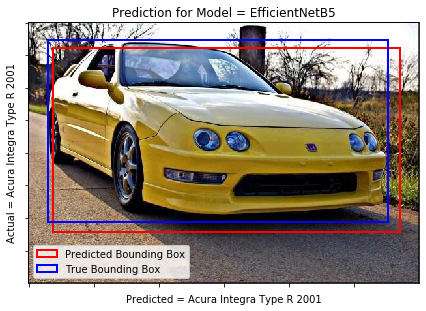

In [88]:
## Let's check now whether bounding boxes are corrected or not
m = metadata_test[10]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

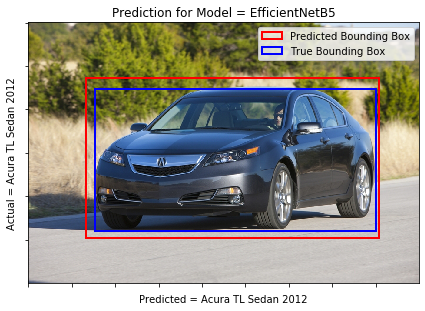

In [89]:
m = metadata_test[100]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

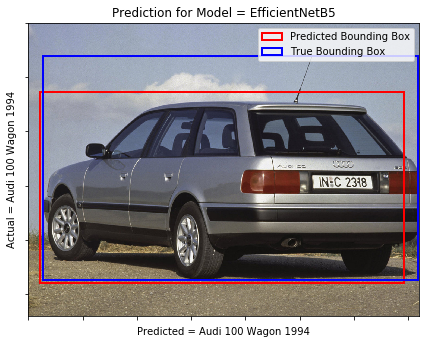

In [90]:
m = metadata_test[500]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

**As we see from above visualizations, bounding boxes are now correct. We will now further fine tune the above network**

### Cyclic Learning Rate
We will employ cyclic learning rate for futher fine tuning. Also we will enable the training for the complete network and use a very small learning rate-range. Cyclic learning rate has been used by taking reference from following paper:

**https://arxiv.org/abs/1506.01186**

In [38]:
## This code has been taken from public repository: 

from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [39]:
## Let's load the weights found in previous 

## You can skip above first part of tuning and directly start further tuning-from here 
model =  GetEfficientNetB5Model_v2()
model.load_weights("weights_first_20_epochs.hdf5")
from keras.callbacks import ModelCheckpoint
losses = {
    "class_label": "categorical_crossentropy",
    "bounding_box": "mean_squared_error",

}

# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
    ## As bounding box is quite good, we can concentrate on classification
    ## and further reduce the effect of bounding-boxes
    "class_label": 10.0,
    "bounding_box": 0.01,
}

metricsAll = {
    "class_label": tensorflow.keras.metrics.CategoricalAccuracy(),
    "bounding_box": IOU_tensorflow_version
}

total_layers = len(model.layers)


## Using a very small range for the learning rate and use the cyclic learning rate
opt = tensorflow.keras.optimizers.Adam(lr=1.2799998785339995e-05)
clr = CyclicLR(mode='triangular', base_lr=6.399999165296323e-06,  ## These are the rates obtained from LRFinder
               max_lr=0.0001,
               step_size= 8 * (len(X_train) // batch_size))

checkpoint = ModelCheckpoint('weights_second_progunfreeze_epochs.hdf5', monitor='val_class_label_loss', verbose=1, 
                             save_best_only=True, mode='min')


## Reducing learning rate by certain amount if accuracy doesn't changes 
reduce_lr = ReduceLROnPlateau(monitor="val_class_class_label_loss", 
                              factor=0.2, patience=1, threshold = 0.9,verbose=1, 
                              mode = 'min')

callbacks_list = [checkpoint, reduce_lr, clr]

batch_size = 16
dataset_train, dataset_val = createDataSetForBatch(batch_size)

model.trainable = True
for layer in model.layers:
    layer.trainable = True
    
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,  metrics=metricsAll)
history = model.fit(dataset_train, validation_data=dataset_val, epochs=20, verbose=1, callbacks=callbacks_list)


Epoch 1/20
509/509 [==============================] - 521s 983ms/step - loss: 5.3435 - class_label_loss: 0.4252 - bounding_box_loss: 109.1287 - class_label_categorical_accuracy: 0.8956 - bounding_box_IOU_tensorflow_version: 0.8987 - val_loss: 9.2068 - val_class_label_loss: 0.7880 - val_bounding_box_loss: 132.6318 - val_class_label_categorical_accuracy: 0.7877 - val_bounding_box_IOU_tensorflow_version: 0.8817

Epoch 00001: val_class_label_loss improved from inf to 0.78804, saving model to weights_second_progunfreeze_epochs.hdf5
Epoch 2/20
509/509 [==============================] - 494s 970ms/step - loss: 4.4059 - class_label_loss: 0.3210 - bounding_box_loss: 119.6051 - class_label_categorical_accuracy: 0.9124 - bounding_box_IOU_tensorflow_version: 0.8926 - val_loss: 9.1752 - val_class_label_loss: 0.7808 - val_bounding_box_loss: 136.7455 - val_class_label_categorical_accuracy: 0.7901 - val_bounding_box_IOU_tensorflow_version: 0.8781

Epoch 00002: val_class_label_loss improved from 0.7880

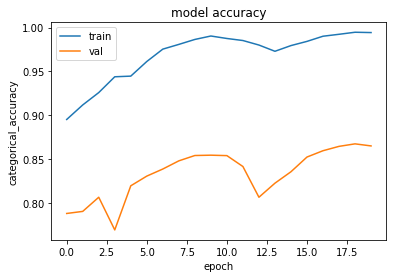

In [42]:
plt.plot(history.history['class_label_categorical_accuracy'])
plt.plot(history.history['val_class_label_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

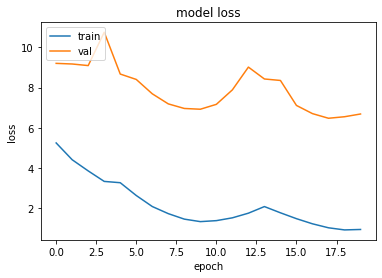

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
model =  GetEfficientNetB5Model_v2()
## Find the accuracy based on fined tuned weights
model.load_weights("weights_second_progunfreeze_epochs.hdf5")
Y_true_label , Y_pred_label, Y_true_bbox, Y_pred_bbox = batchWisePrediction(model, metadata_test, 64, labelEncode)
print("Test Accuracy = ", accuracy_score(Y_true_label, Y_pred_label))
print("Test IOU = ", IOU(Y_true_bbox, Y_pred_bbox))

100%|██████████| 125/125 [03:03<00:00,  1.47s/it]

Test Accuracy =  0.8668076109936576
Test IOU =  0.8907


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


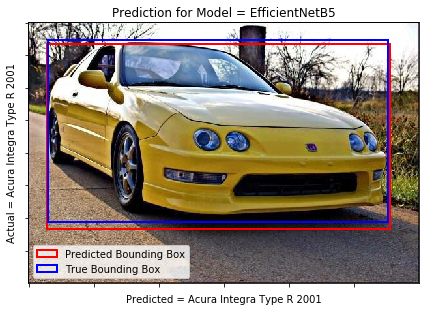

In [92]:
m = metadata_test[10]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

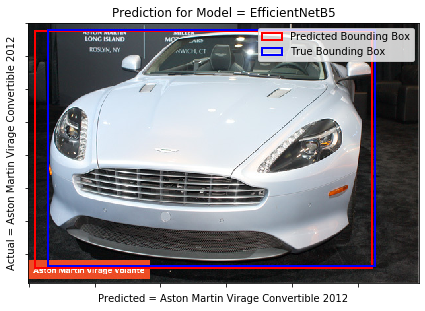

In [94]:
m = metadata_test[376]
image = load_image(m.image_path())
true_bbox = m.bbox
true_label = m.label
pred_label, pred_bbox = ModelPredictionOnImage(model, image, true_bbox, true_label)
pred_label_name = label_df[label_df.index == pred_label[0]]['carname'].values[0]
true_label_name = label_df[label_df.index == true_label]['carname'].values[0]
DatasetMetaData.image_with_bbox(image, pred_bbox, 
                                True, None, None, true_bbox, 
                                "EfficientNetB5",
                                pred_label_name,
                                true_label_name
                                )

**Further fine-tuning increased the accuracy to 87% and IOC is 0.8907.  These are our final results....**

### Confusion Matrix

Confusion Matrix


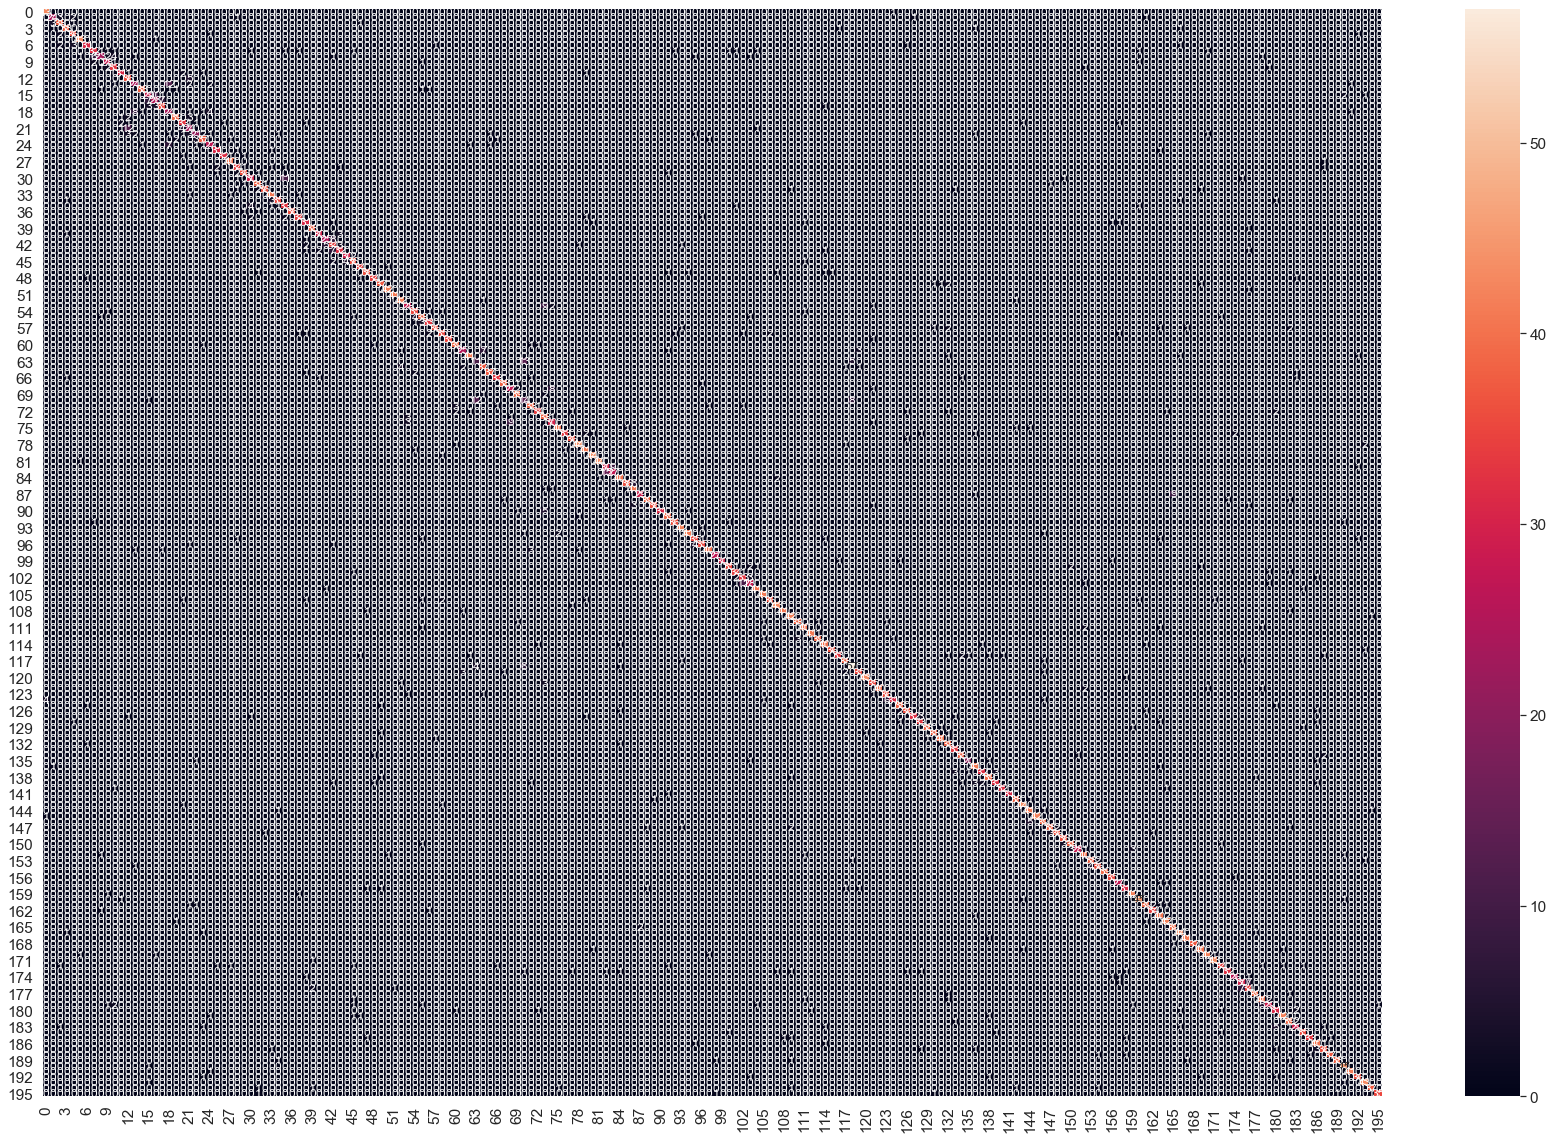


Classification Report


In [99]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix')
cm = confusion_matrix(Y_true_label, Y_pred_label)
plt.figure(figsize = (30,20))
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
print('Classification Report')

In [111]:
print(classification_report(Y_true_label-1, Y_pred_label-1, target_names=label_df['carname'].values))

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.90      0.98      0.93        44
                                   Acura RL Sedan 2012       0.83      0.75      0.79        32
                                   Acura TL Sedan 2012       0.81      0.88      0.84        43
                                  Acura TL Type-S 2008       0.90      0.90      0.90        42
                                  Acura TSX Sedan 2012       0.84      0.90      0.87        40
                             Acura Integra Type R 2001       0.93      0.98      0.96        44
                              Acura ZDX Hatchback 2012       0.91      0.79      0.85        39
              Aston Martin V8 Vantage Convertible 2012       0.78      0.71      0.74        45
                    Aston Martin V8 Vantage Coupe 2012       0.79      0.56      0.66        41
                  Aston Martin Virage C

# Summary

Objective: To create a Deep Learning based model for Car detection
Tasks completed to achieve this:
Images imported and mapped to its classes  and annotations made 
Exploratory Data analysis and steps for preprocessing identified
Preprocessing of data – normalization and resizing of images and bounding boxes done along with data augmentation to improve model performance and reduce generalization error
Trained and Tested a set of CNN based models and other hybrid architectures and models evaluated based on relevant performance measures .
Learning Rate Finder, Cyclic Learning Rate, progressive unfreezing, batch size , dropout techniques applied to improve performance
EfficientNetB5 gave the best results in terms of classification  and localization (>85%). Best Model pickled and saved
User interface created using Streamlit  for loading data and visualization, training and inference based on pretrained models and provide comparison across the models. 


Given more time for model tuning and with better processor capabilities , could try and  improve the performance of the trained model and could explore other state of the art models. 
Explore other tools PyTorch instead of Keras , docker containerization and other tools for user interface creation.
More diligence on data and creating new set of classes if required. 
Detailed error analysis and identifying distinct images and retrain the model till performance is improved.


The Stream lit based User Interface  Implementation of the code is available in the file AIML_Capstone_CV_CarDetection_MarsGrp2CV2_UICode.py